**Выпускной проект Яндекс.Практикума**

**Курс: Аналитик данных**

---



**СОДЕРЖАНИЕ**

---
[**Описание проекта**](#description)

[**Импорт библиотек и загрузка данных**](#loading)

[**Предобработка данных**](#preparing)

[**Исследовательский анализ данных (EDA)**](#EDA)

[**Сегментация клиентов банка**](#segmentation)

[**Формулировка и проверка статистических гипотез**](#hypotheses)

[**Выводы и рекомендации**](#summary)

---




**МАТЕРИАЛЫ К ПРОЕКТУ**

<a  href='https://drive.google.com/file/d/1SY0Gu9Z5P88aXBfEJNs59Ji4hJoCc_O-/view?usp=sharing'>Ссылка на файл с презентацией</a> 

<a  href='https://public.tableau.com/app/profile/konstantin.a.petin/viz/Methanprombankclientssegmentation/Dashboard1?publish=yes'>Ссылка на дашборд </a>

---



## **Описание проекта**<a  class="anchor" id="description"></a>

##  **Импорт библиотек и загрузка данных**<a  class="anchor" id="loading"></a>

In [1]:
# импортируем библиотеки для работы с данными, построения моделей и визуализации информации

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import phik

from scipy import stats as st

import warnings
warnings.filterwarnings("ignore")

In [2]:
# устанавливаем параметры отображения данных
pd.set_option("precision", 2)
pd.set_option('display.max_columns', 15)
pd.set_option('display.max_colwidth', 40)

sns.set(style="whitegrid")

In [3]:
# загружаем данные
try:
    df=pd.read_csv(' ')
    
except:
    url='https://drive.google.com/file/d/ /view?usp=sharing'
    url2='https://drive.google.com/uc?id=' + url.split('/')[-2]
    df = pd.read_csv(url2)


## **Предобработка данных**<a  class="anchor" id="preparing"></a>

Проверим датасет на соотвествие типов данных описанию, отсутствие пропусков и дубликатов в категориях.

In [4]:
def check_dataset(dataset):
    """
    Функция для вывода информации о структуре и типах данных датафрейма, проверки на пропуски в столбцах и дубликаты записей
    Принимает на вход датафрейм
    Выводит информацию о:
    типах данных, наименовании столбцов и количестве записей в датафрейме;
    наличии пропусков в данных и их долей по столбцам;
    наличии и количестве дубликатов записей;
    десять случайных записей из датафрейма
    """
    
    try:
        name =[x for x in globals() if globals()[x] is dataset][0]
        width = 10*len(dataset.columns)
        print('\033[1m','Проверка таблицы: {}'.format(name),'\033[0m')
        print('.'*width)
        print('\033[1m','\nИнформация о типах данных:', '\033[0m')
        display(dataset.info())
        print('.'*width)
        if dataset.isna().mean().sum()==0:
            print('\033[1m', '\nПропусков в столбцах \033[32;1m НЕТ', '\033[0m')
        else:
            print('\033[1m', '\nДоля пропусков в столбцах:', '\033[0m')
            display(pd.DataFrame(round((dataset.isna().mean()*100),2)).style.background_gradient())
        print('.'*width)
        if dataset.duplicated().sum()==0:
            print('\033[1m', '\nДубликатов строк \033[32;1m НЕТ', '\033[0m')
        else:
            print('\033[1m', '\nКоличество дубликатов: \033[31;1m{}\033[0m'.format(dataset.duplicated().sum()))
        print('.'*width)
        print('\033[1m', '\n10 случайных строк датафрейма', '\033[0m')
        display(dataset.sample(10))
           
    except:
        print('Ошибка')

In [5]:
check_dataset(df)

 Проверка таблицы: df 
........................................................................................................................
 
Информация о типах данных: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+

None

........................................................................................................................
 
Доля пропусков в столбцах: 


,0
userid,0.00
score,0.00
City,0.00
Gender,0.00
Age,0.00
Objects,0.00
Balance,36.17
Products,0.00
CreditCard,0.00
Loyalty,0.00


........................................................................................................................
 
Дубликатов строк  НЕТ 
........................................................................................................................
 
10 случайных строк датафрейма 


,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
7372,15760436,683,Рыбинск,М,34,9,114609.55,2,0,1,25339.29,0
7588,15642763,579,Рыбинск,М,33,1,NaN,2,1,1,54816.57,0
7942,15704145,542,Ярославль,Ж,42,1,NaN,1,1,1,178256.58,1
2465,15654807,763,Рыбинск,Ж,32,10,95153.77,1,0,1,81310.10,0
3271,15751527,584,Рыбинск,М,32,9,85534.83,1,0,0,169137.24,0
8066,15738555,504,Ростов Великий,М,43,5,134740.19,2,1,0,181430.91,0
7150,15733886,699,Ярославль,Ж,32,4,110559.46,1,1,1,127429.56,0
2799,15818398,760,Ярославль,М,43,8,121911.59,1,1,0,193312.33,0
2775,15825204,850,Рыбинск,М,51,3,109799.55,2,1,1,12457.76,1
2131,15835396,614,Ярославль,М,38,2,116248.88,1,1,0,105140.92,0


**Выводы:**
Датафрейм содержит 10000 уникальных записей о клиентах банка. Названия столбцов в таблице не соотвествуют общеупотребимым номрмам написания. Типы данных столбцов соотвествуют описанию. В данных по полю "Баланс на счёте" содержатся пропущенные данные, более 36% об общего количества записей. 



---


Получаем перечень названий столбцов. Наблюдается следующая проблема: названия столбцов имеют стиль CamelCase и содержат прописные буквы.

In [6]:
df.columns

Index(['userid', 'score', 'City', 'Gender', 'Age', 'Objects', 'Balance',
       'Products', 'CreditCard', 'Loyalty', 'estimated_salary', 'Churn'],
      dtype='object')

Переименуем столбцы для удобства дальнейшей работы. Проверим результат.



In [7]:
df.rename({'userid':'user_id', 'City':'city', 'Gender':'gender', 'Age':'age', 'Objects':'objects', 'Balance':'balance',
       'Products':'products', 'CreditCard':'credit_card', 'Loyalty':'loyalty', 'Churn':'churn'},axis='columns',inplace=True)

In [8]:
df.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'objects', 'balance',
       'products', 'credit_card', 'loyalty', 'estimated_salary', 'churn'],
      dtype='object')



---

Пропущенные значения по полю "balance" в количестве более 1/3 общего числа записей, при условии отсуствия ошибок фиксации и выгрузки данных, могут свидетельствовать о двух ситуациях их возникновения:

    1) пропущенные значения соотвествуют нулевому балансу на действующем счете клиента;
    2) пропущенные значения свидетельствуют об отсуствии у клиента открытого дебетового счета.

В случае верности первого предположения, в данных, наряду с пропущенными значениями баланса, могут присуствовать нулевые значения для "пустых" дебетовых счетов.
Получим основные статистические параметры стобца данных "Баланс на счете".

In [9]:
df['balance'].describe()

count      6383.00
mean     119827.49
std       30095.06
min        3768.69
25%      100181.98
50%      119839.69
75%      139512.29
max      250898.09
Name: balance, dtype: float64

В информации датафрейма о балансе дебетовых счетов клиентов отсуствуют данные о наличии нулевых сумм. Таким образом, нельзя утверждать с уверенностью о том, что пропуски в данных являются отображением нулевых сумм на счетах.

Заполним пропущенные значения по полю "Баланс на счете" нулевыми значениями как маркером отсуствующих данных. В дальнейшем исследовании, при анализе баланса клиентов эти данные будут исключены. 
Также создадим столбец 'zero_balance', содержащий признак отсуствующего значения баланса для исследования наличия значимых различий в признаках портрета клиентов имеющих и не имеющих информацию о наличии сумм на дебетовом счете.

In [10]:
df['balance']=df['balance'].fillna(0)
df['zero_balance']=df.apply(lambda x: 0 if x['balance']!=0 else 1, axis=1)

---


## **Исследовательский анализ данных (EDA)**<a  class="anchor" id="EDA"></a>



Получим основные статистические показатели по числовым признакам датафрейма.

In [11]:
df.drop('user_id',axis=1).describe()

,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,zero_balance
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0,10000.00
mean,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.2,0.36
std,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.4,0.48
min,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0,0.00
25%,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.0,0.00
50%,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.91,0.0,0.00
75%,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.0,1.00
max,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0,1.00


Среднестатистический клиент банка "Метанпром" (по предоставленным данным) это человек в возрасте 37 лет, он активный пользователь не менее одного продукта банка с довольно высоким кредитным рейтингом 652, заяввивший о 5ти потенциальных объектах залога в собственности, имеющий открытую кредитную карту и дебетовый счет в банке на сумму более 97000 рублей. Его доход оценивается в в сумму 100194.



---


### **Построение распределений количественных признаков для клиентов банка**

Построим и опишем распределение значений основных количественных признаков, характеризующих клиентов банка.

Объявим функции для визуализации распределениня значений признаков.

In [12]:
def plot_histplot(dataframe,column,hue=None,discrete=False,xticks=0,multiple="stack",axvline=True,show=True):
    '''
    Функция построения гистограммы распределения количественного признака датафрейма
    Принимает на вход датафрейм, наименовние признака, наименование структурирующего признака
    Значение параметра discrete равное True позволяет использовать в качестве корзин только значения признака,
    фактически присутствующие в датафрейме
    Значение параметра xticks не равное 0 позволяет задать для подписей оси категорий только значения признака,
    фактически присутствующие в датафрейме
    Возвращает или отрисовывает объект matplotlib.axes.Axes
    '''
    f, ax = plt.subplots(figsize=(11, 9))
    ax=sns.histplot(data=dataframe, x=column, hue=hue, discrete=discrete, multiple=multiple)
    if axvline:
        ax.axvline(dataframe[column].mean(), color='red',label='mean')
        ax.axvline(dataframe[column].median(), color='green',label='median')
    ax.set_title('Distribution of feature: '+column)
    ax.title.set_fontsize(18)
    ax.legend()
    if xticks!=0:
        ax.set(xticks=xticks)
    if show:
        plt.show()
    else:
        return ax

In [13]:
def plot_scatterplot(dataframe, column1, column2, title, xlabel, ylabel,xticks=None,xtickslabels=None):
    '''
    Функция для построения точечной диаграммы рассеивания двух признаков датафрейма
    Принмает на вход датафрейм, наименования столбцов, название графика и подписи осей
    Возвращает и отрисовывает объект matplotlib.axes.Axes
    '''
    fig, ax = plt.subplots()
    ax.scatter(dataframe[column1], dataframe[column2], c = 'r', alpha=0.5,s=60)
    ax.set_title(title)
    ax.title.set_size(20)
    
    if xticks:
        ax.set_xticks(xticks)
        ax.set_xticklabels(xtickslabels)
    
    ax.set_xlabel(xlabel, fontsize=14,color='black')
    ax.set_ylabel(ylabel, fontsize=14,color='black')

    fig.set_figwidth(15)
    fig.set_figheight(8)
    plt.show()

In [14]:
def plot_barplot(dataframe,column1,column2,title):
    '''
    Функция построения столбчатой диаграммы зависимости признаков датафрейма
    Принимает на вход датафрейм, наименование признаков, название графика
    Возвращает и отрисовывает объект matplotlib.axes.Axes
    '''
    f, ax = plt.subplots(figsize=(15, 7))
    sns.barplot(data=dataframe,x=column2, y=column1,color='tab:blue')
    for i, v in enumerate(dataframe[column2]):
        ax.text(v*0.85, i,format(v, '.0f'), fontsize=18,color='w')
    ax.axvline(dataframe[column2].max(), color='red')
    ax.set_title(title)
    ax.title.set_fontsize(18)
    plt.show()


In [15]:
def two_bars_plot(dataframe,column1,column2,title, xlabel, ylabel):
    '''
    Функция построения парной столбчатой диаграммы зависимости признаков датафрейма
    Принимает на вход датафрейм, наименование признаков, название графика и подписи осей
    Возвращает и отрисовывает объект matplotlib.axes.Axes
    '''
    fig, ax = plt.subplots()
    x=np.arange(1,dataframe.shape[0]+1)
    bar1=ax.bar(x, dataframe[column1], width=0.5, color='tab:blue', ec='black', align='center',label=column1)
    bar2=ax.bar(x+0.2, dataframe[column2], width=0.5, color='tab:grey', ec='black', align='center',label=column2)
    ax.set_xticks(x)
    ax.set_xticklabels(dataframe.index, fontsize=14,color='black')

    def autolabel(bars):
        for bar in bars:
            h = bar.get_height()
            ax.text(bar.get_x()+bar.get_width()/1.8, 0.9*h, format(h, '.0f'),
                    ha='center', va='bottom', fontsize=18,color='w')

    autolabel(bar1)
    autolabel(bar2)
   
    ax.set_title(title)
    ax.title.set_size(20)
    
    ax.set_xlabel(xlabel, fontsize=14,color='black')
    ax.set_ylabel(ylabel, fontsize=14,color='black')

    fig.set_figwidth(15)
    fig.set_figheight(7)
    ax.legend(fontsize=14, loc='lower right')
    ax.grid()
    fig.tight_layout()
    plt.show()

In [16]:
def plot_sev_hists(ncols, column, dfs, titles, xlabel, ylabel, **kwargs):
    '''
    Функция построения гистограмм одноименных признаков для нескольких (2-4) датафреймов
    Принимает на вход количество датафреймов, наименование признака, массив датафреймов,
    массив наименований графиков и подписи осей
    Возвращает и отрисовывает объект matplotlib.axes.Axes
    '''
    fig, ax = plt.subplots(nrows=1, ncols=ncols)
    fig.set_size_inches(ncols*7, 10)
    plt.subplots_adjust(wspace=0.2)
    ylim_min=[]
    ylim_max=[]
    for i in range(ncols):
        if dfs[i][column].nunique()<20:
            bins=dfs[i][column].nunique()
            xticks=dfs[i][column].unique()
            setxticks=True
        else:
            bins='auto'
            setxticks=False
            ax[i].axvline(dfs[i][column].mean(), color='red')
        ax[i].hist(dfs[i][column],bins=bins)
        if setxticks:
            ax[i].set_xticks(xticks)
        ax[i].title.set_text(titles[i])
        ax[i].title.set_fontsize(18)
        ax[i].set_xlabel(xlabel)
        ax[i].set_ylabel(ylabel)
        ylim_min.append(ax[i].get_ylim()[0])
        ylim_max.append(ax[i].get_ylim()[1])
    miny = min(ylim_min)
    maxy = max(ylim_max)
    for i in range(ncols):
        ax[i].set_ylim([miny, maxy])
    plt.tight_layout()
    plt.show()



---


Построим распределение значений кредитного рейтинга для клиентов банка по предоставленным данным.

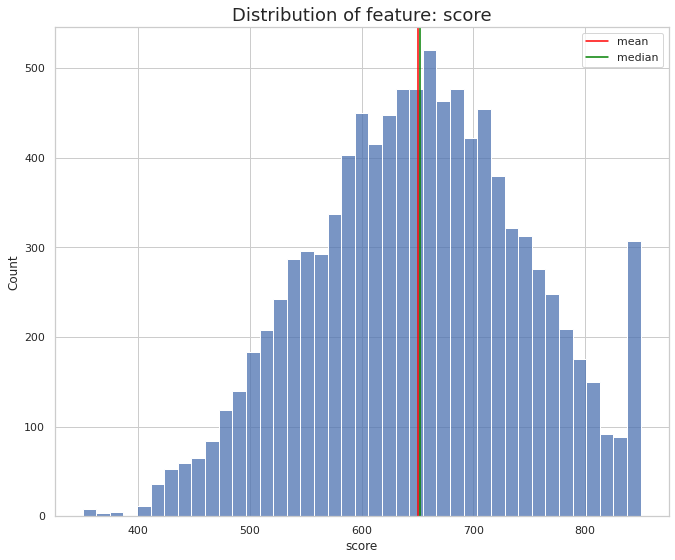

In [17]:
plot_histplot(df,'score')

Клиенты с кредитным рейтингом менее 500 (статистическое описание параметров):

In [18]:
df[df['score']<500].drop('user_id',axis=1).describe()

,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,zero_balance
count,632.00,632.00,632.00,632.00,632.00,632.00,632.00,632.00,632.00,632.00
mean,462.93,38.91,5.08,80294.23,1.52,0.72,0.47,103307.48,0.24,0.34
std,30.11,10.27,2.82,62792.37,0.58,0.45,0.50,57842.57,0.43,0.47
min,350.00,19.00,0.00,0.00,1.00,0.00,0.00,878.87,0.00,0.00
25%,445.00,32.00,3.00,0.00,1.00,0.00,0.00,56598.88,0.00,0.00
50%,470.00,37.00,5.00,100697.76,1.00,1.00,0.00,101297.60,0.00,0.00
75%,487.00,44.00,8.00,131097.26,2.00,1.00,1.00,155828.38,0.00,1.00
max,499.00,84.00,10.00,221532.80,4.00,1.00,1.00,199505.53,1.00,1.00


Клиенты с максимальным кредитным рейтингом (статистическое описание параметров):

In [19]:
df[df['score']==df['score'].max()].drop('user_id',axis=1).describe()

,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,zero_balance
count,233.0,233.00,233.00,233.00,233.00,233.00,233.00,233.00,233.00,233.00
mean,850.0,38.92,4.82,78718.99,1.52,0.70,0.55,95919.32,0.18,0.33
std,0.0,10.57,2.86,61529.90,0.57,0.46,0.50,61941.68,0.39,0.47
min,850.0,19.00,0.00,0.00,1.00,0.00,0.00,705.18,0.00,0.00
25%,850.0,32.00,2.00,0.00,1.00,0.00,0.00,40313.47,0.00,0.00
50%,850.0,37.00,5.00,98488.08,1.00,1.00,1.00,92053.75,0.00,0.00
75%,850.0,43.00,7.00,126776.30,2.00,1.00,1.00,152996.89,0.00,1.00
max,850.0,81.00,10.00,212778.20,4.00,1.00,1.00,199775.67,1.00,1.00


**Выводы:** Данные о кредитном рейтинге визуально имеют нормальное распределение относительно среднего значения в 650 со смещением в сторону низких значений score (менее 500, 6,3% записей). Данные о распределении возрастных групп клиентов обладающих кредитным рейтингом ниже 500 не позволяют сделать вывод об их принадлежности к молодой возрасной группе, не имеющей релевантной кредитной истории. 
Средние значения баланса дебетового счета и предполагаемого дохода для клиентов с низкой платежной дисциплиной превышают аналогичные показатели для 2,33% клиентов банка имеющих максимальный кредитный рейтинг.



---


Проверим существуют ли различия в кредитном рейтинге для клиентов разных возрастов.

Создадим копию датафрейма и добавим в него столбец с возрастными группами клиентов.

In [20]:
df_ages=df.copy()
max_age=df_ages['age'].max()
labels=['<30','31-40','41-50','51-60','>60']
df_ages['age_group']=pd.cut(df_ages['age'],bins=[0, 30, 40, 50, 60,max_age],labels=labels)

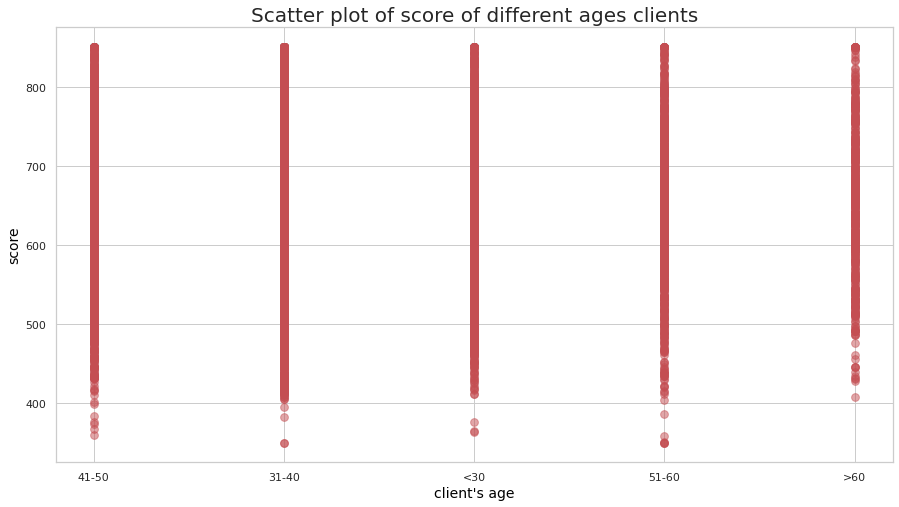

In [21]:
title='Scatter plot of score of different ages clients'
xlabel="client's age"
ylabel='score'
plot_scatterplot(df_ages, 'age_group', 'score', title, xlabel, ylabel)

Диаграмма рассеивания показывает  тенденцию возрастания показателей кредитного рейтинга при смещении по временной шкале вправо.

Рассчитаем средние значения кредитного рейтинга для возрастных групп и визуализируем на графике.

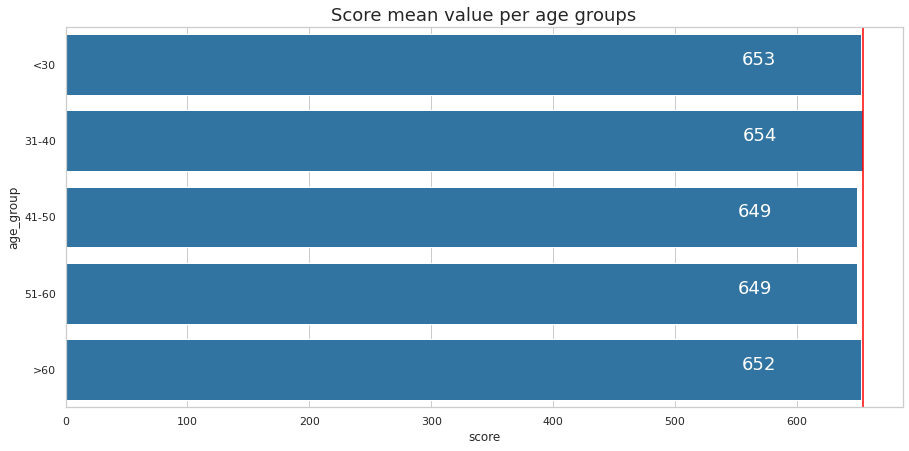

In [22]:
df_ages_score=df_ages.groupby('age_group',as_index=False)['score'].agg('median')
plot_barplot(df_ages_score,'age_group','score','Score mean value per age groups')


График не демострирует общего тренда увеличения среднего кредитного рейтинга с ростом возрастной группы, и показывает, что, в среднем, наилучшей платежной дисциплиной обладают клиенты, отнесенные к группе "31-40 лет".



---

Построим распределение информации о возрасте клиентов банка по предоставленным данным.

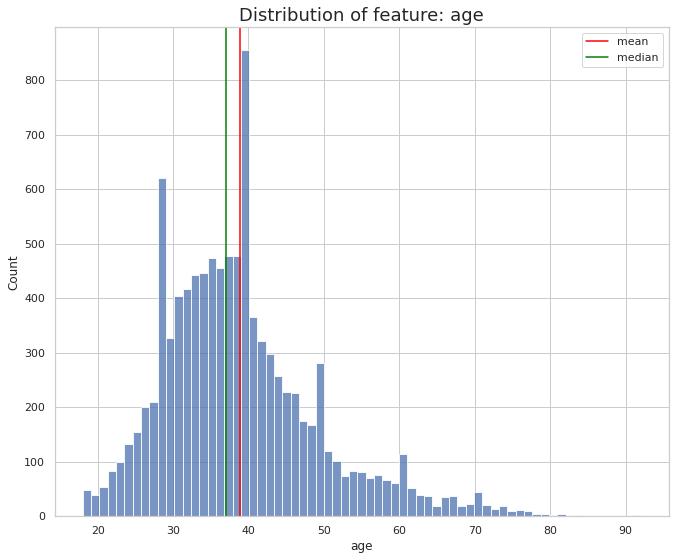

In [23]:
plot_histplot(df,'age')

Клиенты возростной группы от 38 до 40 лет (статистическое описание параметров):

In [24]:
df[(df['age']>=38)&(df['age']<=40)].drop('user_id',axis=1).describe()

,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,zero_balance
count,1332.00,1332.00,1332.00,1332.00,1332.00,1332.00,1332.00,1332.00,1332.00,1332.00
mean,652.17,38.97,5.03,75527.62,1.52,0.71,0.47,100313.17,0.17,0.37
std,97.84,0.83,2.88,62460.47,0.56,0.45,0.50,56533.45,0.37,0.48
min,350.00,38.00,0.00,0.00,1.00,0.00,0.00,96.27,0.00,0.00
25%,584.00,38.00,3.00,0.00,1.00,0.00,0.00,52853.29,0.00,0.00
50%,654.50,39.00,5.00,96773.84,1.00,1.00,0.00,99242.12,0.00,0.00
75%,719.00,40.00,7.00,127372.28,2.00,1.00,1.00,147817.67,0.00,1.00
max,850.00,40.00,10.00,250898.09,4.00,1.00,1.00,199862.75,1.00,1.00


**Выводы:** распределение данных о возрасте клиентов имеет имеет смещение вправо, что характерно для временных рядов описывающих возрастной состав групп.
Более половины клиентов банка старше 37 лет, средний возраст составляет около 39 лет. Самой массовой узкой возрастной группой являются клиенты в возрасте от 38 до 40 лет (13,3% записей). Это самая лояльная банку когорта (коэффициент оттока и его стандартное отклониние ниже среднего) с кредитным рейтингом выше среднего значения, хотя их остаток средств на дебетовых счетах и предполагаемый доход ниже таковых у среднестатистического клиента "Метанпрома". 



---

Построим распределение информации о дебетовом балансе клиентов банка по предоставленным данным (исключая записи с пропущенными значениями).

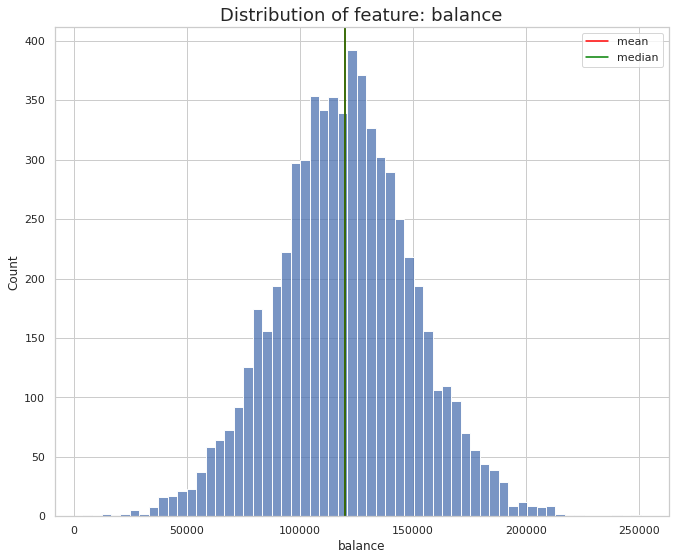

In [25]:
plot_histplot(df[df['zero_balance']==0],'balance')

In [26]:
df[df['zero_balance']==0]['balance'].quantile([0.15,0.85])

0.15     89314.71
0.85    150325.18
Name: balance, dtype: float64

Распределение данных о балансе на существующих дебетовых счетах клиентов взуально совпадает с нормальным (форма распределения, медиана совпадает со средним, короткие правый и левый "хвосты" графика). 70% клиентов "Метанпрома", имеющих действующие дебетовые счета, держат на них от 89 до 150 тысяч.

Построим точечную диаграмму рассевиания для проверки гипотезы о зависимости баланса счета от возраста клиента.

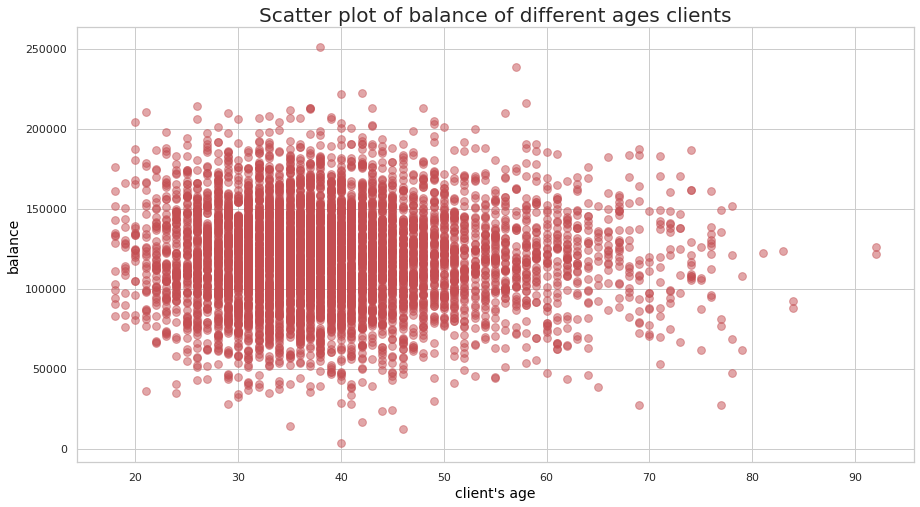

In [27]:
title='Scatter plot of balance of different ages clients'
xlabel="client's age"
ylabel='balance'
plot_scatterplot(df[df['balance']!=0], 'age', 'balance', title, xlabel, ylabel)

Диаграмма показывает неравномерную плотность данных (затухание разброса от предполагаемой линии среднего значения баланса счета) с увеличением возраста клиентов. Проверим связано ли это с уменьшением численности возрастных групп при движении вправо по временной шкале или для этих групп существуют различия в размере остатка на счете.

Рассчитаем средний остаток на счетах в зависимости от принадлежности клиента к возрастной группе. Визуализируем на графике

In [28]:
dg_ages_balance=df_ages[df_ages['balance']!=0].groupby('age_group',as_index=False)['balance'].agg('mean')

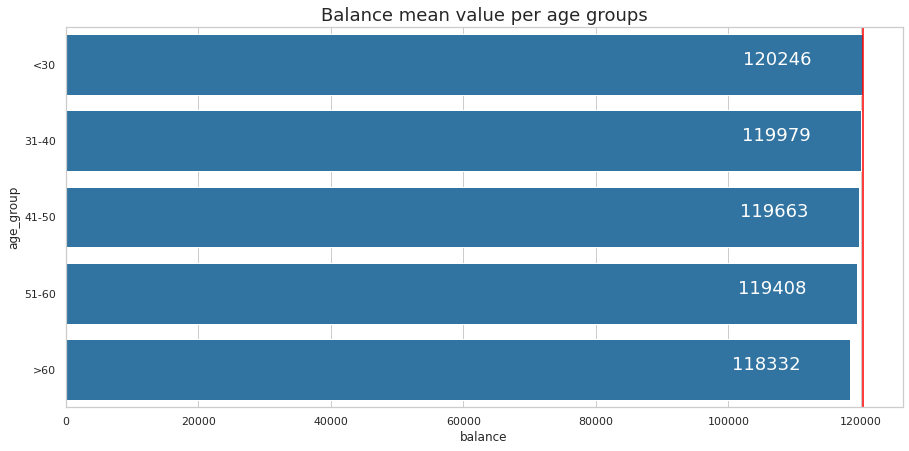

In [29]:
plot_barplot(dg_ages_balance,'age_group','balance','Balance mean value per age groups')

График показывает незначительное снижение (максимальный цепной темп снижения менее 1%) среднего размера остатка на дебетовых счетах клиентов с увеличением возрасной группы.

Можно сделать вывод об отстуствии у клиентов "Метанпрома" старших возрастов большей склонности к традиционным накоплениям в виде депозитов. Однако для этого еще потребуется проверка среднего ожидаемого дохода этих групп клиентов.



---

Построим распределение информации о ожидаемом доходе клиентов банка по предоставленным данным.

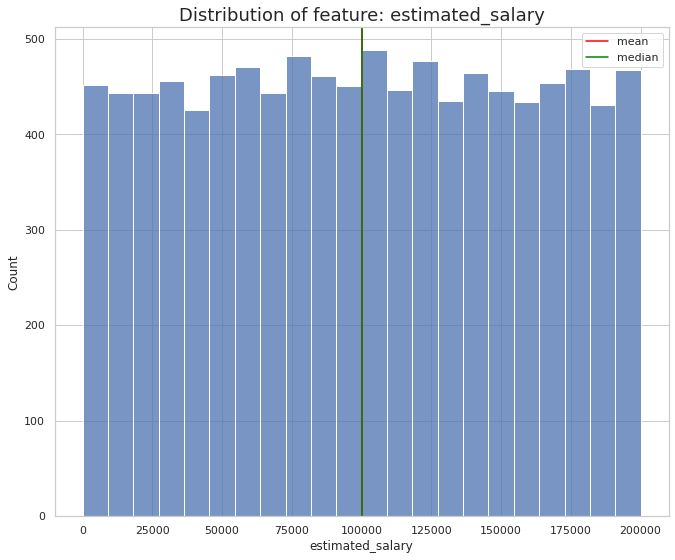

In [30]:
plot_histplot(df,'estimated_salary')

Данные об ожидаемом доходе клиентов практически равномерно распределены в диапазоне от 11 до 199999. Это противоречит ожиданиям, основанным на эмпирическом знании. Однако, так как информация об источнике данных об ожидаемом доходе клиентов(анкета клиента или математическая модель) не предоставлена , природу такого характера распределения установить не представляется возможным.

Проанализируем как распределены данные об ожидаемом доходе клиентов по возрастным группам по всему датафрейму.

In [31]:
dg_ages_salary=df_ages.groupby('age_group',as_index=False)['estimated_salary'].agg('mean')

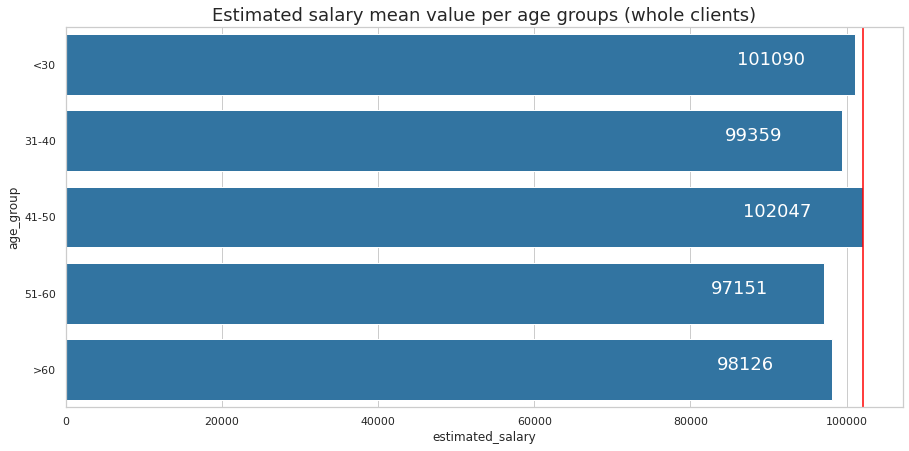

In [32]:
plot_barplot(dg_ages_salary,'age_group','estimated_salary','Estimated salary mean value per age groups (whole clients)')

Выше среднего предполагается доход для молодой страты клиентов (до 30 лет) и клиентов в возрасте от 41 до 50 лет. Самый низкий доход ожидается у клиентов предпенсионного возраста.

Посмотрим на распределение баоанса счета и среднего дохода для возрастных групп клиентов имеющих депозиты в банке "Метанпром".

In [33]:
df_ages_salary_dep=df_ages[df_ages['balance']!=0].groupby('age_group')['balance','estimated_salary'].agg('mean')

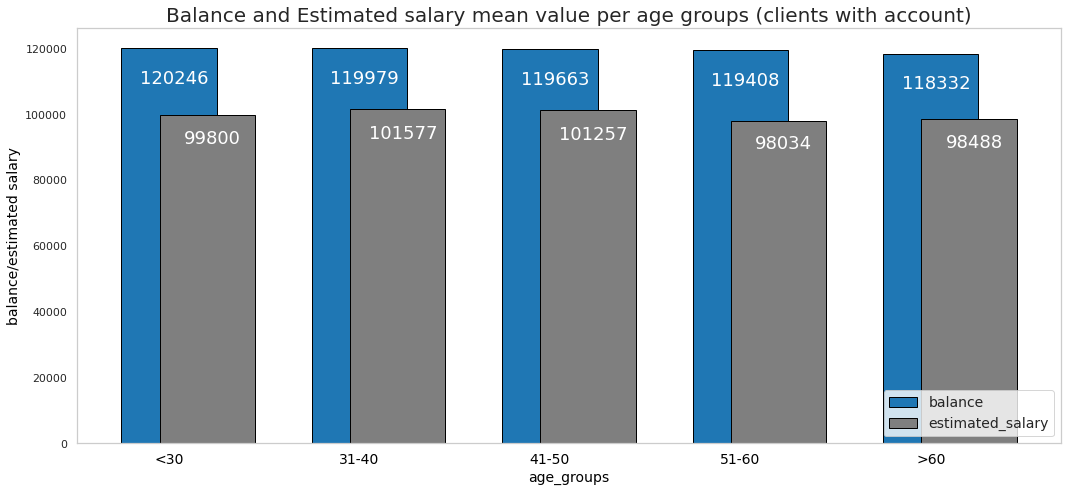

In [34]:
two_bars_plot(df_ages_salary_dep,'balance','estimated_salary','Balance and Estimated salary mean value per age groups (clients with account)', 'age_groups', 'balance/estimated salary')

Соотношение средних баланса счета и ожидаемого дохода для клиентов разных возрасных групп не имеет существенных различий. Клиенты "Метанпрома" старших возрастных групп ( старше 51 года) не демонстрируют склонности к бОльшим накоплениям по сравнению с другими клиентами. Более того, соотношение balance/salary групп до 31 года и свыше 51 совпадают - 120-121%.



---

Построим распределение информации о заявленном клиентами банка количестве объектов в собственности по предоставленным данным.

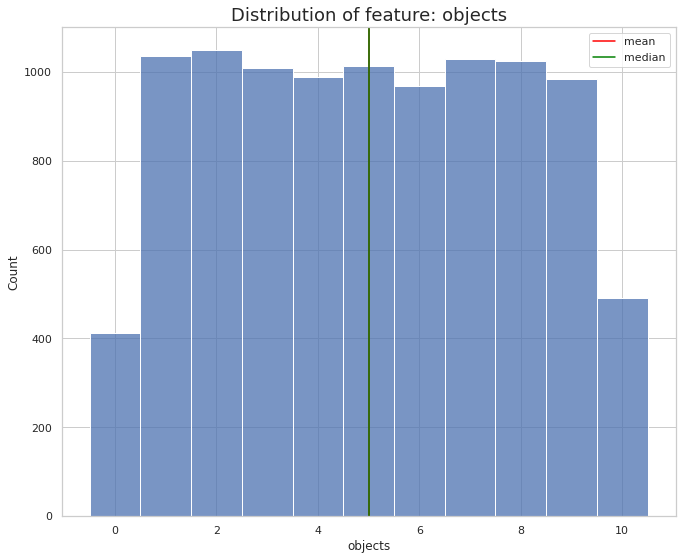

In [35]:
plot_histplot(df,'objects',discrete=True)

In [36]:
df['objects'].corr(df['estimated_salary'])

0.007783825455810554

**Выводы:** Данные о количестве объектов в собственности клиентов практически равномерно распределены в диапазоне от 1 до 9 (исключая пограничные значения 0 и 10). В данном случае распределение о форме совпадает с распределением данных об ожидаемом доходе клиентов.  Это соответствует ожиданиям, основанным на эмпирическом знании "большему доходу соотвествуют большие залоговые возможности". Однако, коэффициент корреляции Пирсона, рассчитанный по этим двум признакам показывает отсутствие взаимного влияния.
Так как информация об источнике данных и характеристиках объектов в собственности клиентов не предоставлена , природу такого характера распределения установить не представляется возможным.



---
Проверим есть ли отличия в распределении признаков для двух выборок: клиенты, имеющие информацию об остатке на счете, и клиенты, для которых такая информация не указана.


In [37]:
df_deb=df[df['zero_balance']==0].copy()
df_cred=df[df['zero_balance']==1].copy()

Построим графики распределений признаков для вышеуказанных групп клиентов.

*Для анализа оставлены только признаки, распределения которых имеют существенное различие по группам.*

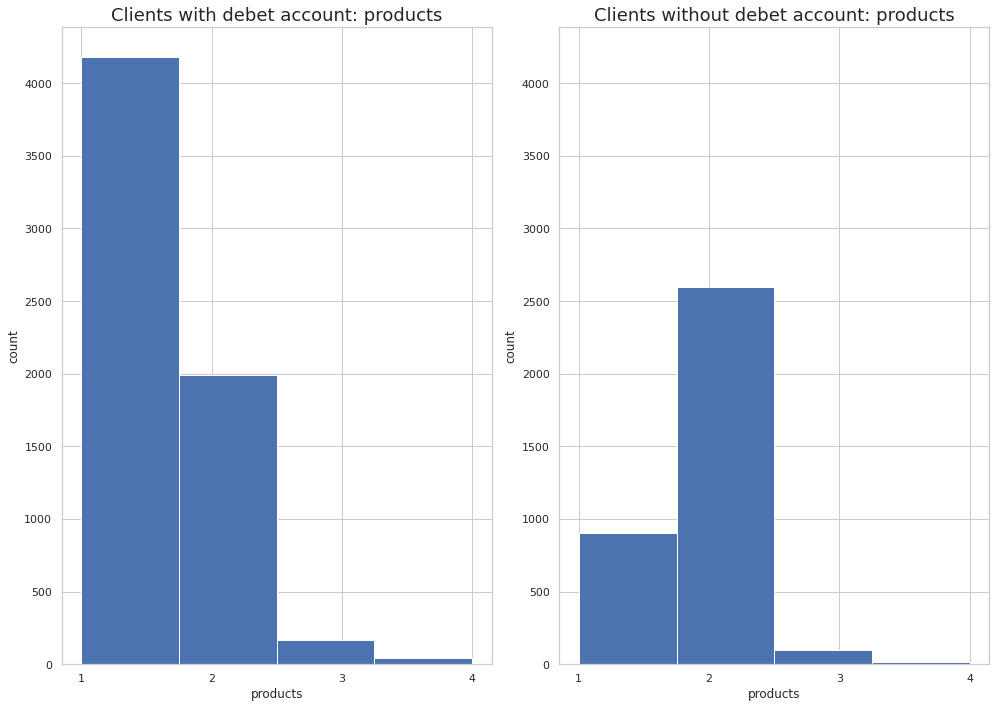

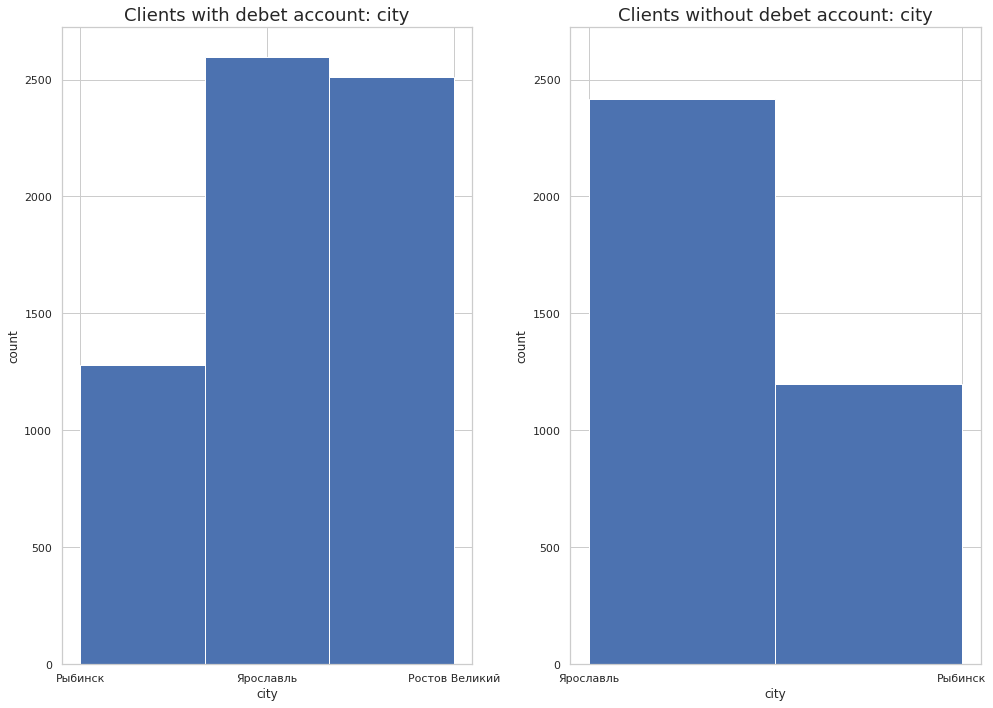

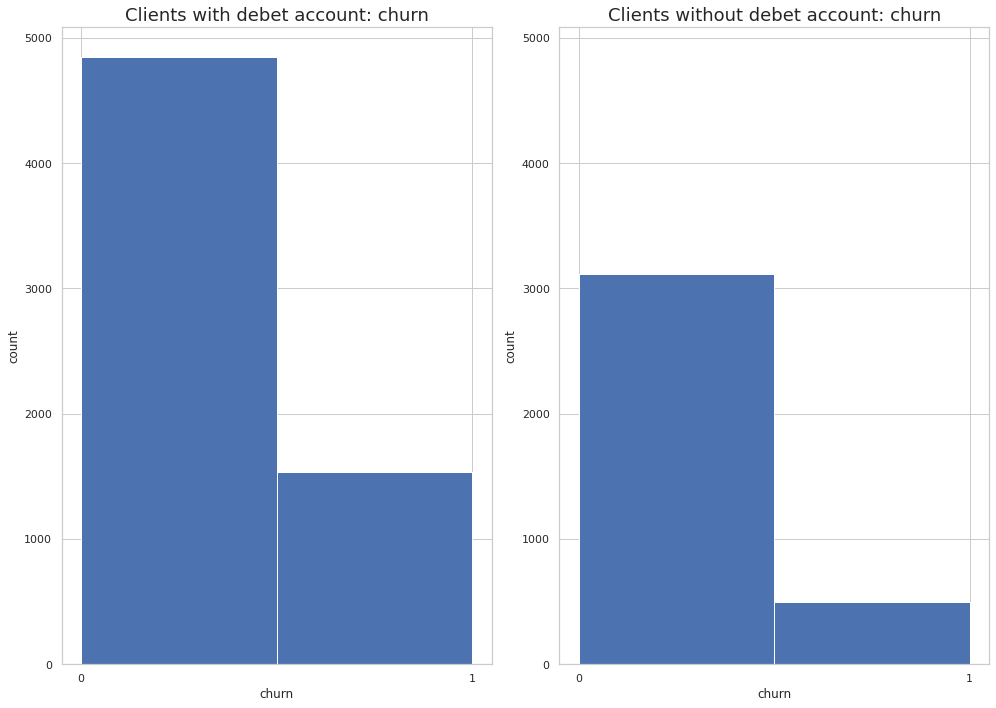

In [38]:
dfs=[df_deb.drop(['user_id','balance','zero_balance'], axis=1),df_cred.drop(['user_id','balance','zero_balance'], axis=1)]
ncols=2
columns=['products','city','churn']
for column in columns:
    titles=['Clients with debet account: '+column,'Clients without debet account: '+column]
    plot_sev_hists(ncols,column, dfs, titles, column, 'count');

**Выводы:** Для половины клиентов, имеющих действующий дебетовый счет, последний является единственным продуктом банка который они используют. В то время как среди клиентов, не имеющих текущего/депозитного счета в "Метанпроме", типичным является пользование двумя продуктами банка.

Клиенты из первой группы территориально расположены в зоне обслуживания всех трех отделений банка. В то время как клиенты, не имеющие информации о дебетовом балансе, относятся только к головному банку в г. Ярославль и отделению в г. Рыбинск. Причем соотношение в этих офисаж клиентов первой и второй групп примерно одинаково.

Клиенты из второй группы демонстрируют большую лояльность банку: коэффициент оттока у второй группы составляет 0,14 против 0,24у первой.

Все вышеперечисленное позволяет предположить об отличиях в продуктовых матрицах отделений: в ассотрименте продуктов, предлагаемых клиентам из Ярослявля и Рыбинска присутсвуют продукты, отсутствующие в Ростове Великом (или не пользующиеся там спросом по тем или иным причинам), стимулирующие лояльность и развитие портфеля банковских продуктов клиентов.

 
---


### **Построение среднестатистические портретов клиентов банка по категориальным признакам**

Составим портреты клиентов банка в зависимости от значения для них категориальных признаков.

In [39]:
agg_dict={'user_id':'count','score':'mean','age':'median', 'objects':'median',  'balance':'mean', 'products':'median','credit_card':'mean', 'loyalty':'mean', 'estimated_salary':'mean', 'churn':'mean'}
def groupping(df,column,agg_dict):
    '''
    Функция для построения среднестатистического портрета клиента на основе значения категориальных (бинарных)
    признаков
    Принимает на вход датафрейм, наименовние категориального признака и словарь с агрегирующих функций для столбцов датафрейма
    Возвращает транспонированный датафрейм со сгруппированными данными
    '''
    agg=agg_dict.copy()
    agg.pop(column, None)
    return round(df.groupby(column).agg(agg),2).T.style.background_gradient(axis=1, cmap= 'Greens')



---


Средние значения признаков для клиентов банка в зависимости от города

In [40]:
groupping(df,'city',agg_dict)

city,Ростов Великий,Рыбинск,Ярославль
user_id,2509.00,2477.00,5014.00
score,651.45,651.33,649.67
age,38.00,37.00,37.00
objects,5.00,5.00,5.00
balance,119730.12,61818.15,62092.64
products,1.00,2.00,1.00
credit_card,0.71,0.69,0.71
loyalty,0.50,0.53,0.52
estimated_salary,101113.44,99440.57,99899.18
churn,0.32,0.17,0.16


Головной офис банка в г. Ярославль аккумулирует более 50% клиентов "Метанпрома". 

Клиенты подразделения в Ростове Великом в среднем старше по возрасту и имеют сравнительно более высокий средний кредитный рейтинг. 

Сравнительно больший портфель продуктов банка сосредоточен у клиентов офиса в г. Рыбинск. Они же являются и самыми активными, хотя и пользуются кредитными картами банка сравнительно меньше клиентов из Ярославля и Ростова Великого.

У среднего клиента ростовского офиса сравнительно самый большой ожидаемый доход, при этом он является в два раза менее лояльнам банку по сравнению с показателями оттока для клиентов остальных двух подразделений.

Проверим меняется ли потрет пользователей услугами банка "Метанпром" по городам для клиентов, одним из используемых продуктов для которых является дебетовый счет.

In [41]:
groupping(df[df['zero_balance']==0],'city',agg_dict)

city,Ростов Великий,Рыбинск,Ярославль
user_id,2509.00,1278.00,2596.00
score,651.45,651.00,650.90
age,38.00,38.00,37.00
objects,5.00,5.00,5.00
balance,119730.12,119814.99,119927.77
products,1.00,1.00,1.00
credit_card,0.71,0.68,0.69
loyalty,0.50,0.55,0.51
estimated_salary,101113.44,100127.28,100625.03
churn,0.32,0.20,0.18


Количество клиентов, имеющих ненулевой дебетовый счет в банке, в ярославском офисе сравнимо с подразделением в Ростове Великом и в два раза выше, чем в рыбинском филиале. *Это означает, что для головного офиса и филиала в г. Рыбинск для около половины клиентов информация о наличии и балансе дебетового счета отсуствует в данных.*

В Рыбинске не имеют информации о дебетовом счете более молодые и менее активные клиенты (с исключением из данных записей о таких клиентах показатели среднего возраста и активности возросли, а медианное число продуктов - снизилось).

Больше всего денег на счетах в "Метанпроме" держит средний клиент головного офиса в Ярославле.

Среди клиентов офисов в г. Ярославль и г. Рыбинск, данные о дебетовых счетах которых не предоставлены, больше лояльных банку (с исключением из данных записей о таких клиентах показатель оттока возрос).



---


Средние значения признаков для клиентов банка в зависимости от пола

In [42]:
groupping(df,'gender',agg_dict)

gender,Ж,М
user_id,4543.00,5457.00
score,650.83,650.28
age,38.00,37.00
objects,5.00,5.00
balance,75659.37,77173.97
products,1.00,1.00
credit_card,0.70,0.71
loyalty,0.50,0.53
estimated_salary,100601.54,99664.58
churn,0.25,0.16


Среди клиентов банка "Метанпром" мужчин на 20% больше, чем женщин. Женщины в среднем старше и имеют чуть более высокий кредитный рейтинг и ожидаемый доход. У мужчин больше денег на балансе, они активнее открывают кредитные карты и, вцелом, являются более активными клиентами и более лояльны банку.



---


Средние значения признаков для клиентов не являющихся и являющихся держателями кредитных карт банка

In [43]:
groupping(df,'credit_card',agg_dict)

credit_card,0,1
user_id,2945.00,7055.00
score,651.35,650.19
age,38.00,37.00
objects,5.00,5.00
balance,77920.79,75886.91
products,1.00,1.00
loyalty,0.52,0.51
estimated_salary,100974.40,99721.16
churn,0.21,0.20


Кредитные карты выпущены для 70,5% клиентов банка "Метанпром". Клиенты, придерживающиеся боле консервативного подхода во временных предпочтениях потребления (не использующие кредитные карты банка) - это люди более зрелого возраста и более строгой платежной дисциплины. Они болеее активны, имеют средний баланс на 2,7% (влияние клиентов без открытых счетов) и ожидаемый доход на 1,3% выше, чем у клиентов, являющихся держателями кредитных карт. Держатели кредитных карт проявляют бОльшую лояльность банку.



---


Средние значения признаков для "не активных" и "активных" клиентов банка

In [44]:
groupping(df,'loyalty',agg_dict)

loyalty,0,1
user_id,4849.00,5151.00
score,647.97,652.93
age,37.00,37.00
objects,5.00,5.00
balance,77134.38,75875.42
products,1.00,2.00
credit_card,0.71,0.70
estimated_salary,100767.20,99452.97
churn,0.27,0.14


Клиентов "Метанпрома", отнесенных к категории "активных", характеризуют три отличительных критерия: их средний кредитный рейтинг существенно больше, портфель продуктов банка шире и лояльность гораздо выше, чем у "не активных". Последние, в то же время, имеют более высокий остаток на счетах (влияние клиентов без открытых счетов), ожидаемый доход, так же они чаще открывают кредитные карты.



---


Средние значения признаков для попавших в "отток" и лояльных клиентов банка

In [45]:
groupping(df,'churn',agg_dict)

churn,0,1
user_id,7963.00,2037.00
score,651.85,645.35
age,36.00,45.00
objects,5.00,5.00
balance,72745.30,91108.54
products,2.00,1.00
credit_card,0.71,0.70
loyalty,0.55,0.36
estimated_salary,99738.39,101465.68


В оток попали 20,4% клиентов банка, записи о которых присуствуют в данных.
Типичный клиент, покинувший банк: женщина 45 лет, с кредитным рейтингом и вероятностью оказаться активным клиентом ниже средних (хотя доход и баланс на счету превышают средние значения), пользующаяся одним продуктом банка (скорее всего это дебетовый счет).



---


### **Построение матриц корреляций признаков**

Построим матрицу линейной корреляции Пирсона для выявления наличия взаимосвязи признаков в исходных данных.

In [46]:
def plot_heatmap(dataframe,title):
    '''
    Функция построения тепловой карты матрицы корреляции
    Принимает на вход датафрейм
    Возвращает и отрисовывает объект matplotlib.axes.Axes
    '''
    f, ax = plt.subplots(figsize=(11, 9))
    sns.heatmap(dataframe, annot = True, fmt='.1g', vmin=-1, vmax=1, center=0, linewidths=1, linecolor='grey', cmap= 'coolwarm', cbar=False)
    ax.set_title(title)
    ax.title.set_fontsize(18)
    plt.show();

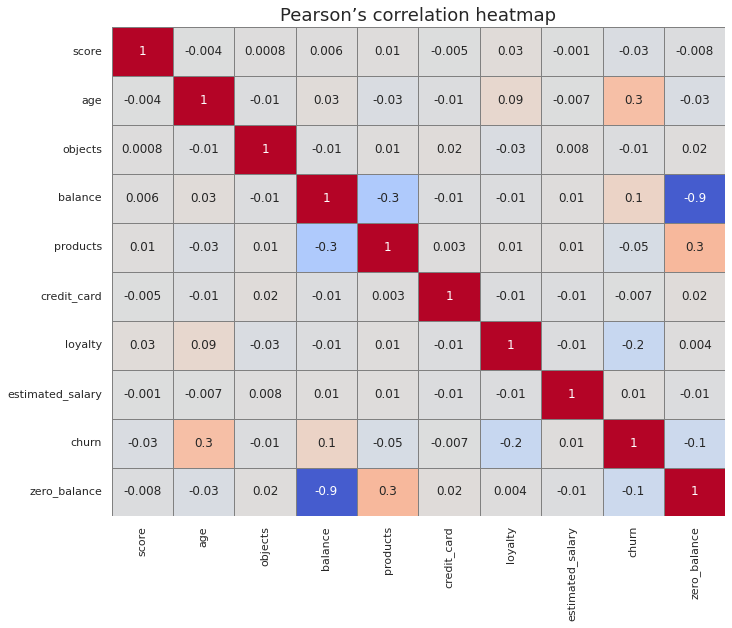

In [47]:
plot_heatmap(df.drop('user_id',axis=1).corr(),title='Pearson’s correlation heatmap')

**Выводы:** Ни по одной из пары признаков в данных о клиентах банка "Метанпром" нет линейной корреляции, свидетельствующей об их взаимосвязи (кроме баланса и производной от него категории).
Однако, две пары признаков демострируют сонаправленность упорядоченных рядов:

- пара "отток-возраст" (с увеличением возраста клиента увеличивается вероятность его оттока);

- пара "количество продуктов-наличие информации о состоянии счета" (если информация о дебетовом счете отсуствует вероятность количества продуктов в портфеле клиента выше среднего повышается).

Также можно отметить небольшую связь противоположной направленности: с увеличением вероятности того, что клиент отнесен к активным, снижается вероятноть того, что он окажется в оттоке.



Построим матрицу корреляции Мэттьюза, более подходящую для выявления наличия взаимосвязи количественных и бинарных признаков в исходных данных.

interval columns not set, guessing: ['score', 'age', 'objects', 'balance', 'products', 'credit_card', 'loyalty', 'estimated_salary', 'churn', 'zero_balance']


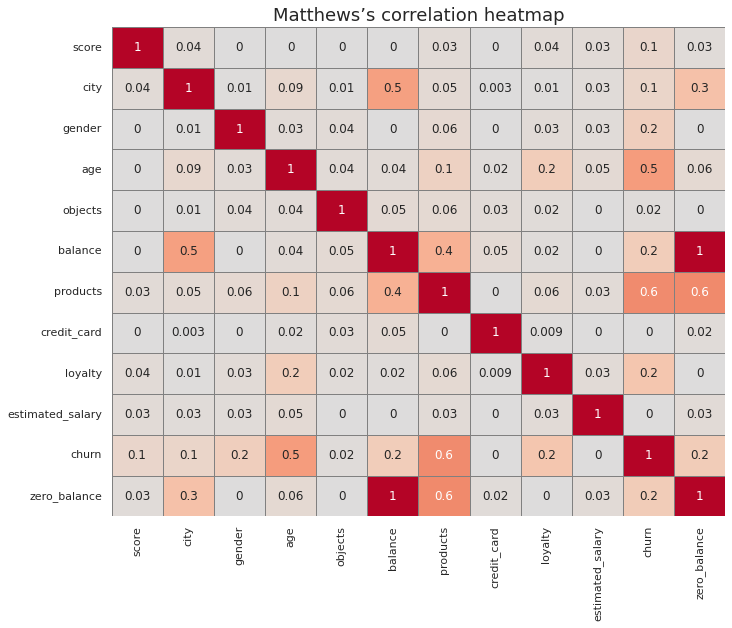

In [48]:
plot_heatmap(df.drop('user_id',axis=1).phik_matrix(),title='Matthews’s correlation heatmap');

**Выводы:** По двум парам признаков в данных о клиентах банка "Метанпром" коэффициенты корреляции Phi свидетельствуют о наличии умеренной взаимосвязи (без указания направленности):
- вероятность оттока возрастает с увеличением количества продуктов у клиента;
- с увеличением количества продуктов у клиента увеличивается вероятность, что у него не открыт дебетовый счет.

Очевидно, что для последней пары на расчет коэффициентов корреляции повлиял дисбаланс размеров групп. Так как это утверждение справедливо только для самых массовых первого и второго сегментов. 

Также пороговая взаимосвязь прослеживается по коэффициентам корреляции для пар:
- "баланс-город" (рассчеты подтвердают, что средний размер баланса дебетового счета для офисов в разных городах отличается);
- "отток-возраст" (в портретах клиентов в среднем более "возрастные" менее лояльны).



---


## **Сегментация клиентов банка**<a  class="anchor" id="segmentation"></a>

Сгруппируем клиентов по количеству используемых продуктов банка, рассчитаем численность сегментов. Также определим лояльность клиентов банка по сегментов (процент оттока).

In [49]:
segments=df.groupby('products').agg({'user_id':'count','churn':'sum'}).reset_index()

In [50]:
segments['share']=segments.apply(lambda x:format(x['churn']/x['user_id'], '.1%'),axis=1)

No handles with labels found to put in legend.


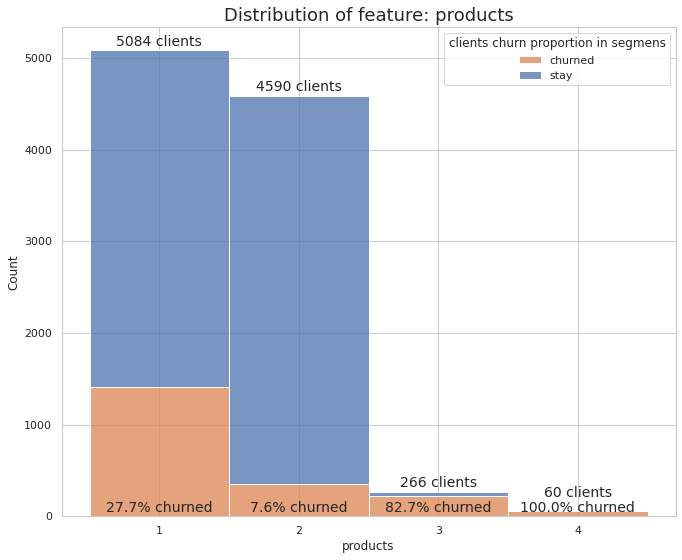

In [51]:
ax=plot_histplot(df,'products','churn',discrete=True,xticks=[1,2,3,4],axvline=False,show=False)
for i in range(segments.shape[0]):
    ax.text(i+1,50, segments.loc[i,'share'] +' churned', ha="center",fontsize=14)
    if segments.loc[i,'user_id']>100:
        ax.text(i+1,segments.loc[i,'user_id']+50, str(segments.loc[i,'user_id'])+' clients', ha="center",fontsize=14)
    else:
        ax.text(i+1,segments.loc[i,'user_id']+150, str(segments.loc[i,'user_id'])+' clients', ha="center",fontsize=14)
ax.legend(title="clients churn proportion in segmens", labels=['churned','stay'])
plt.show();

Наиболее мнегочисленными и устойчивыми являются сегменты клентов с количеством продуктов 1 и 2. На их долю приходится 96,7% клиентской базы.

Отобразим соотношение клиентов разных городов в сегментах.

No handles with labels found to put in legend.


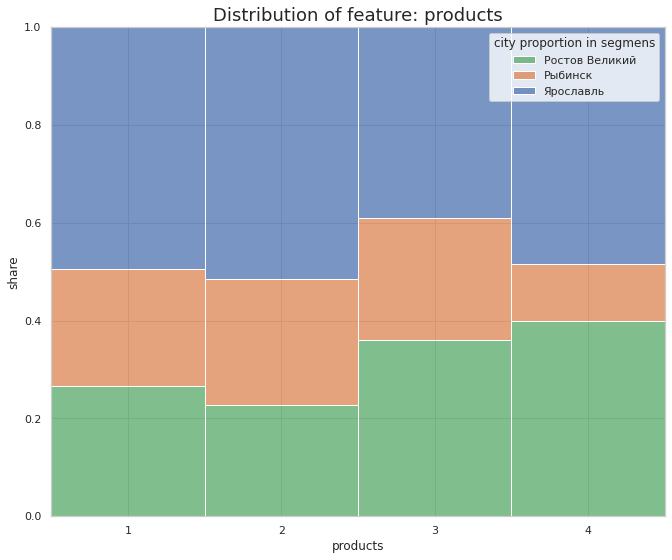

In [52]:
ax=plot_histplot(df,'products','city',discrete=True,xticks=[1,2,3,4],multiple='fill',axvline=False,show=False)
ax.set_ylabel('share')
ax.legend(title="city proportion in segmens", labels=['Ростов Великий','Рыбинск','Ярославль'])
plt.show()

Соотношение клиентов разных городов в разных сегментах не одинаково и не совпадает с общей пропорцией по датасету: Ярославль/Рыбинск/Ростов Великий = 50%/25%/25%.

Среди клиентов с количеством продуктов 3 и 4 доля филиала в Ростове Великом достигает 35-40%, в то время как для сегментов 1 и 2 продукта эта доля не превышает 27%.

В сегментах клиентской базы 1, 2 и 3 продукта доля рыбинского офиса сравнительно стабильна 24-25%, в сегменте с 4мя продуктами она падает до 12%.

Головной офис представлен в в сегментах 1, 2 и 4 продукта с долей от 48 до 52%. И только в сегменте клиентов, имеющих в портфеле три продукта банка, доля Ярославля падает до 39%.

Проанализируем отток клиентов по сегментам в зависимости от их принадлежности к подразделениям банка.

In [53]:
city_pivot=df.pivot_table(index='products',columns='city',values='churn',aggfunc=['count','mean'])

In [54]:
city_pivot.columns.droplevel()
city_pivot.set_axis(['Ростов Великий users', 'Рыбинск users', 'Ярославль users', 'Ростов Великий churn rate', 'Рыбинск churn rate',
       'Ярославль churn rate'],axis='columns',inplace=True)

In [55]:
city_pivot

,Ростов Великий users,Рыбинск users,Ярославль users,Ростов Великий churn rate,Рыбинск churn rate,Ярославль churn rate
products,,,,,,
1,1349,1221,2514,0.43,0.22,0.22
2,1040,1183,2367,0.12,0.07,0.06
3,96,66,104,0.90,0.79,0.79
4,24,7,29,1.00,1.00,1.00


Набольший отток по всем сегментам зафиксирован в подразделении в Ростове Великом: от 12% по самому устойчивому сегменту "2 продукта" до 90-100% по сегментам с 3мя и 4мя продуктами. Всего филиал потерял 32,5% клиентской базы.

Примерно одинаковый отток произошел в головном офисе в Ярославле и в филиале в Рыбинске: от 6-7% по сегменту с 2мя продуктами до 100% в сегменте "4 продукта".
Общие потери: 16,1-16,7% клиентов.



---

Составим портреты среднестатистических представителей каждого из четырех сегментов.

In [56]:
df['gender_ratio']=df.apply(lambda x: 0 if x['gender']=='М' else 1, axis=1)
agg_dict['gender_ratio']='mean'
agg_dict['zero_balance']='mean'
groupping(df,'products', agg_dict)

products,1,2,3,4
user_id,5084.00,4590.00,266.00,60.00
score,649.12,652.19,648.11,653.58
age,38.00,36.00,42.00,45.00
objects,5.00,5.00,5.00,5.00
balance,98551.87,51879.15,75458.33,93733.14
credit_card,0.70,0.71,0.71,0.68
loyalty,0.50,0.53,0.42,0.48
estimated_salary,99487.26,100452.01,104318.13,104763.72
churn,0.28,0.08,0.83,1.00
gender_ratio,0.45,0.45,0.56,0.63


**Сегмент "1 продукт"**

Клиент из первого сегмента это - с вероятностью 55%, мужчина 38 лет, единстенным продуктом нашего банка для которого является дебетовый счет (82% вероятности). Кредитный рейтинг у него чуть ниже среднего, его ожидаемый доход примерно равен его балансу. С равной вероятность он можен быть отнесен и нет к активным клиентам.

**Сегмент "2 продукта"**

Типичный клиент, у которого в портфеле 2 продукта нашего банка, это - с вероятностью 55%, мужчина 36 лет, в 57 случаях из ста он не открывал дебетовый счет, поэтому его баланс в два раза ниже ожидаемого дохода. Кредитный рейтинг у него выше среднего, как и вероятность оказаться держателем кредитной карты или быть отнесенным к группе активных клиентов. 

**Сегмент "3 продукта"**

Средний клиент, пользующийся тремя продуктами банка, это - женщина (56% вероятности) 42 лет, одной из услуг "Метанпрома" для которой (с вероятностью 63%) является открытие и ведение дебетового счета. Ее ожидаемый доход существенно ниже баланса. Она вряд ли будет отнесена к активным клиентам. кроме того кредитный рейтинг у нее ниже среднего по банку.

**Сегмент "4 продукта"**

Средний в ряду 60ти клиентов, пользующихся четырьмя продуктами банка, это тоже женщина (63% вероятности), более старшего возраста - 45 лет. Скорее всего у нее весть открытый дебетовый счет (с вероятностью 77%), на котором лежит сумма сопоставимая с ее ожидаемым доходом (в среднем самым большим среди сегментов). Кредитный рейтинг у нее выше среднего по банку и в сравнении со средними по сегментам. Вероятность, что у нее открыта кредитная карта - ниже средней по клиентсткой базе, как и шансы бать отнесенной к активным клиентам.



---

Построим распределение признаков для сформированных сегментов пользователей.

In [57]:
segment_1=df[df['products']==1].copy().drop(['user_id','products'],axis=1)
segment_2=df[df['products']==2].copy().drop(['user_id','products'],axis=1)
segment_3=df[df['products']==3].copy().drop(['user_id','products'],axis=1)
segment_4=df[df['products']==4].copy().drop(['user_id','products'],axis=1)

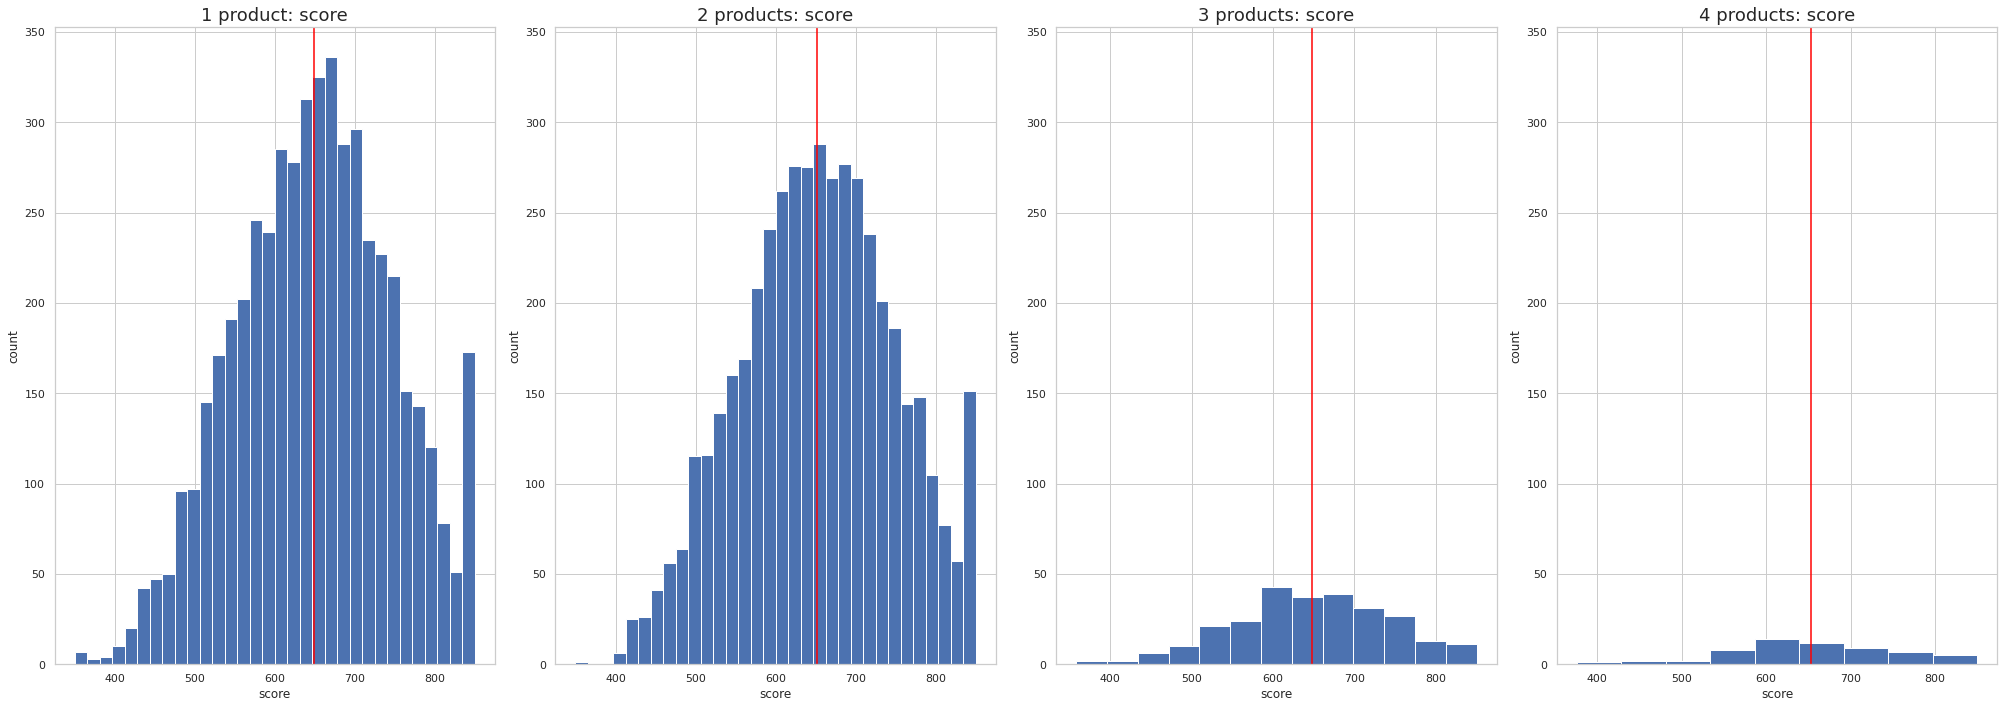

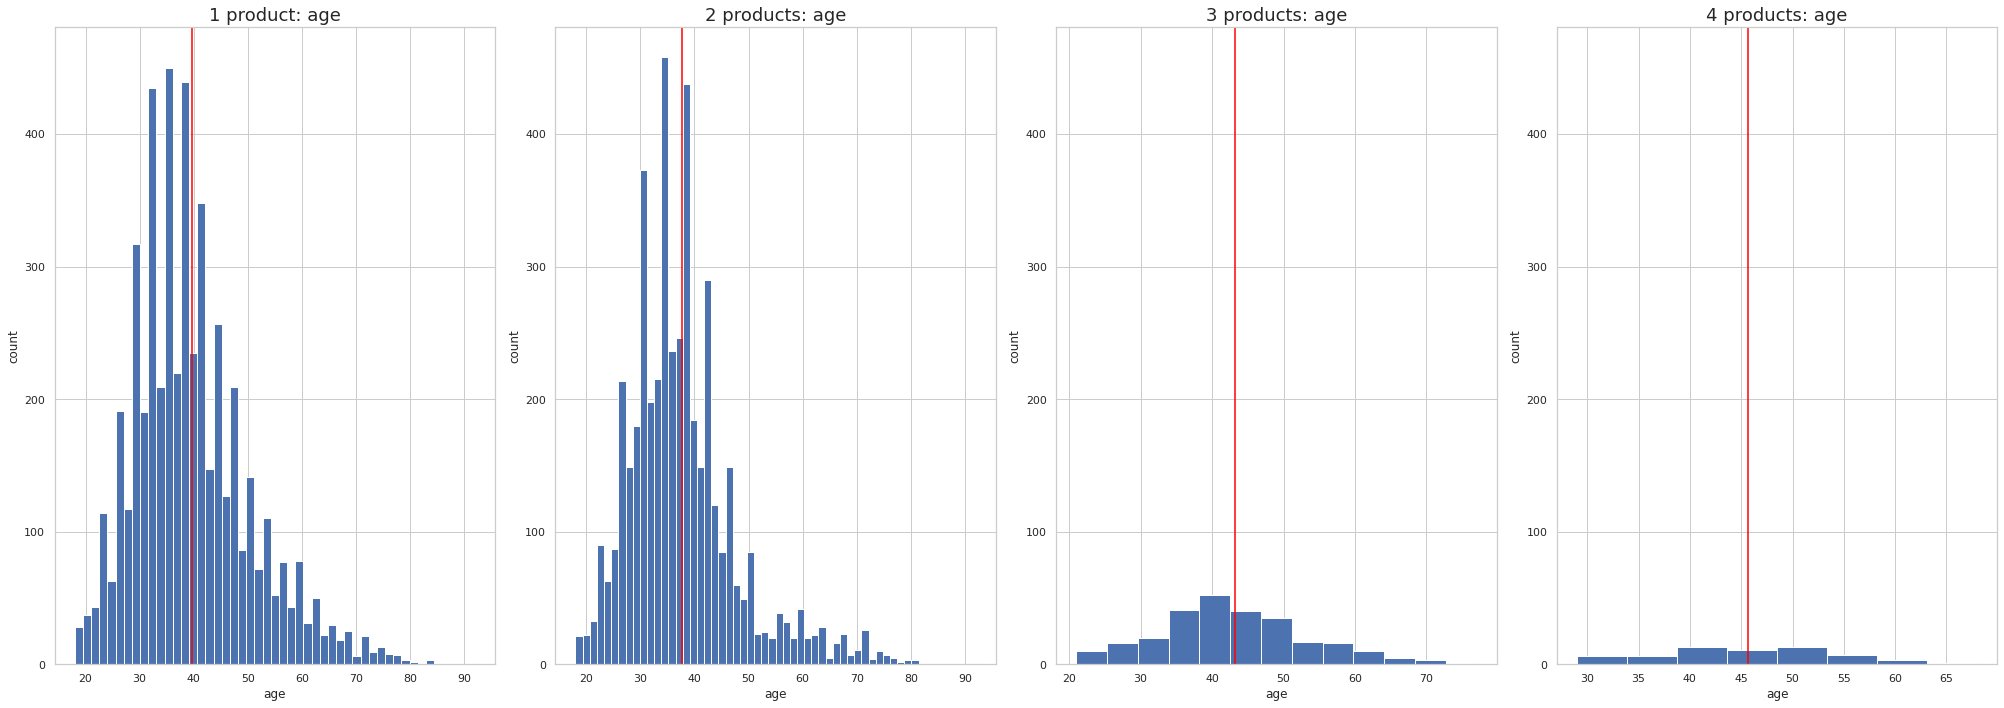

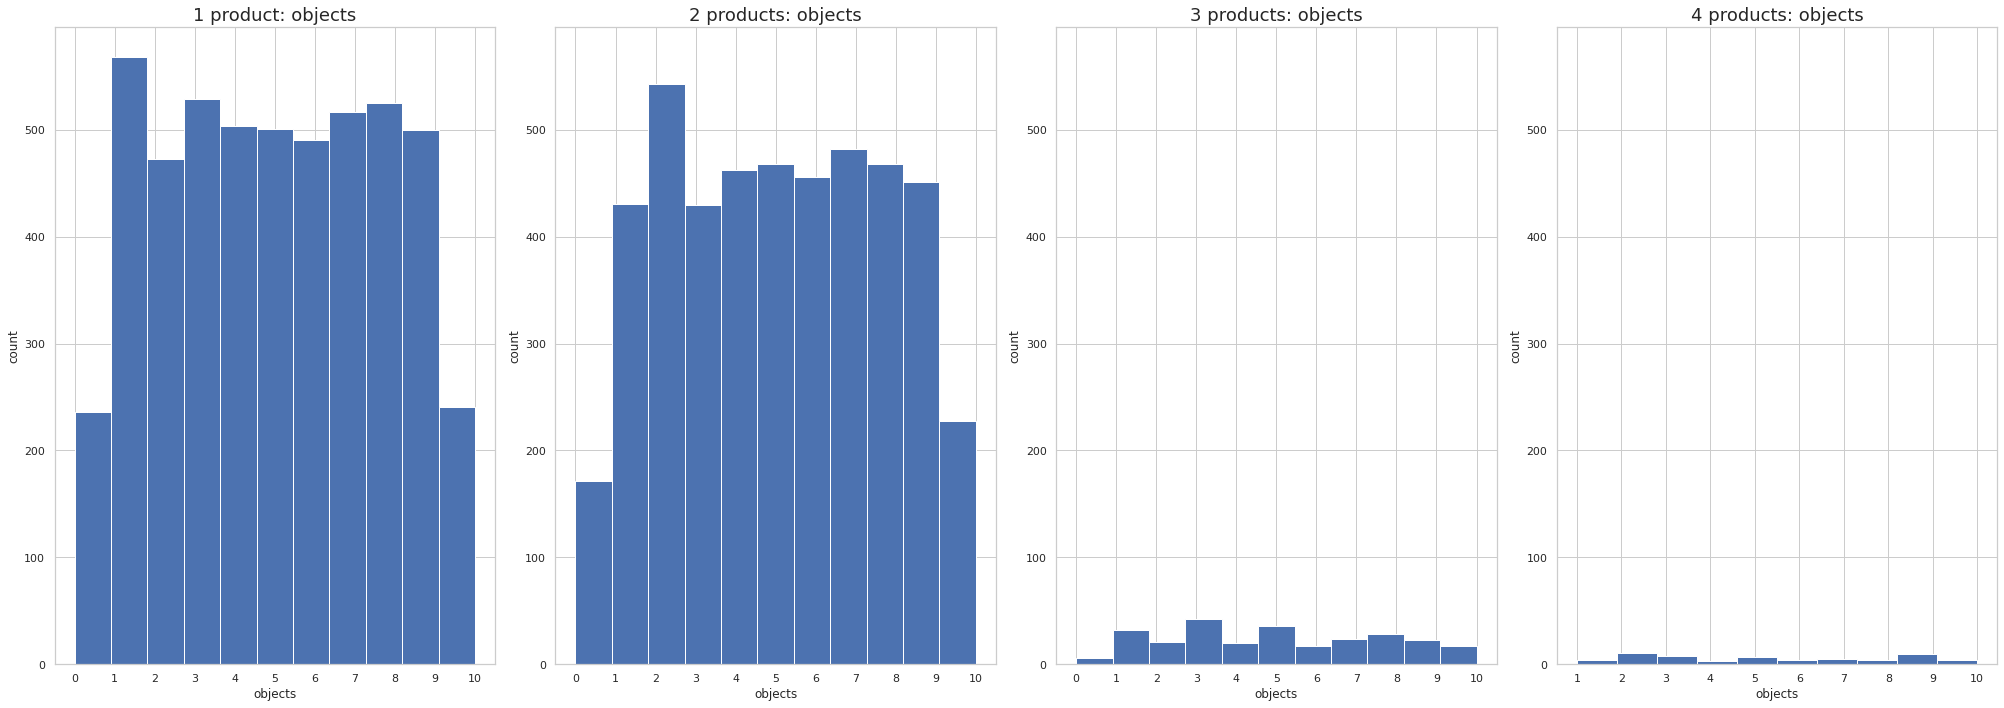

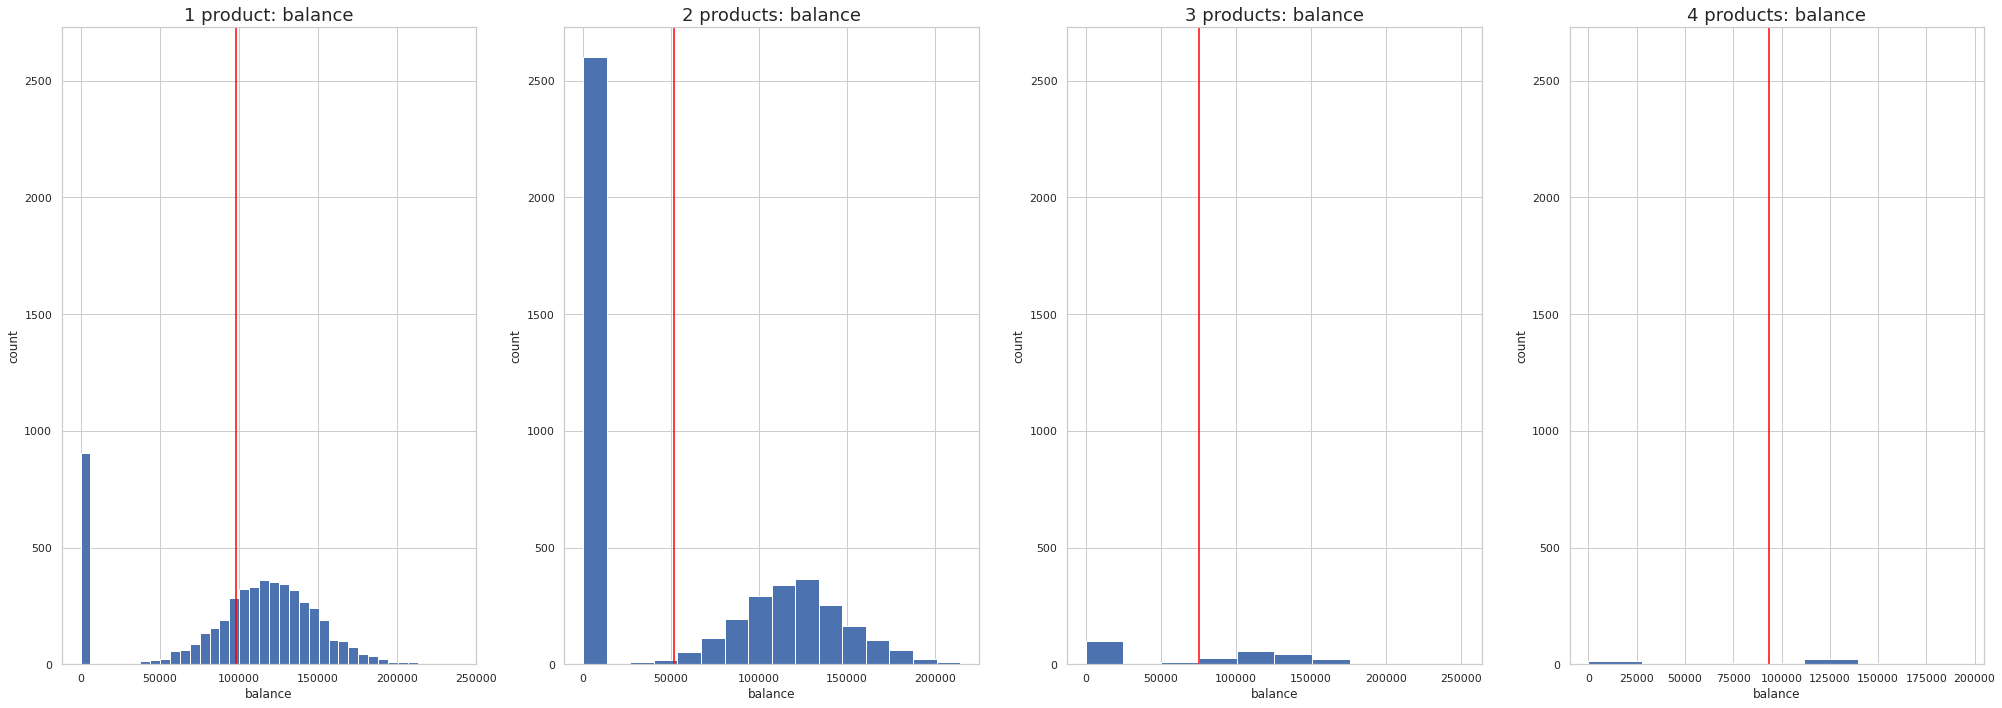

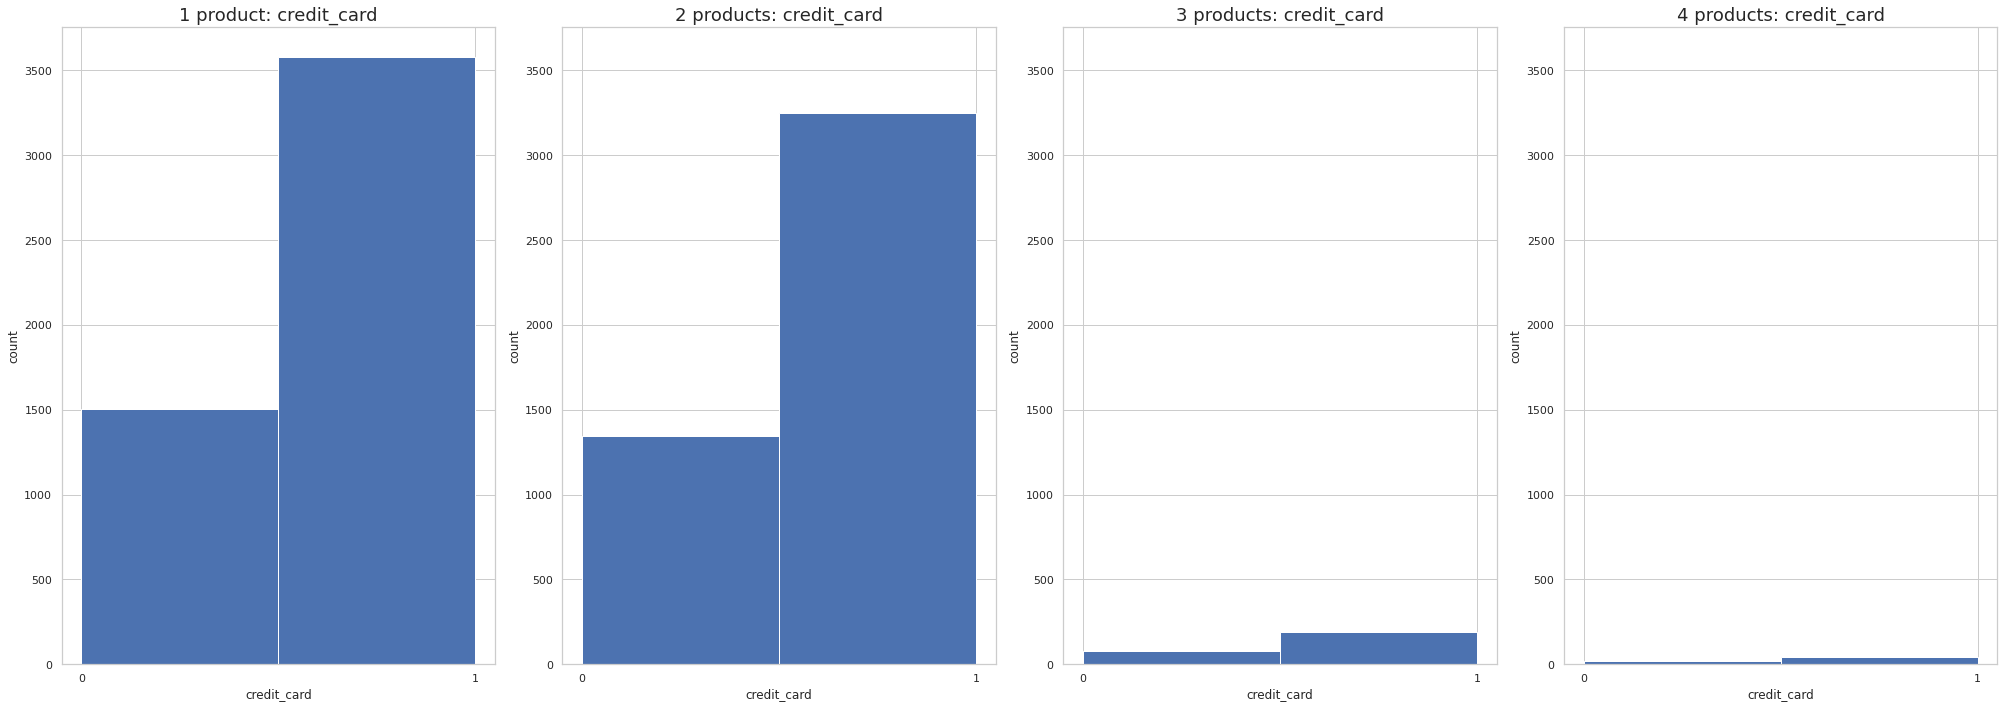

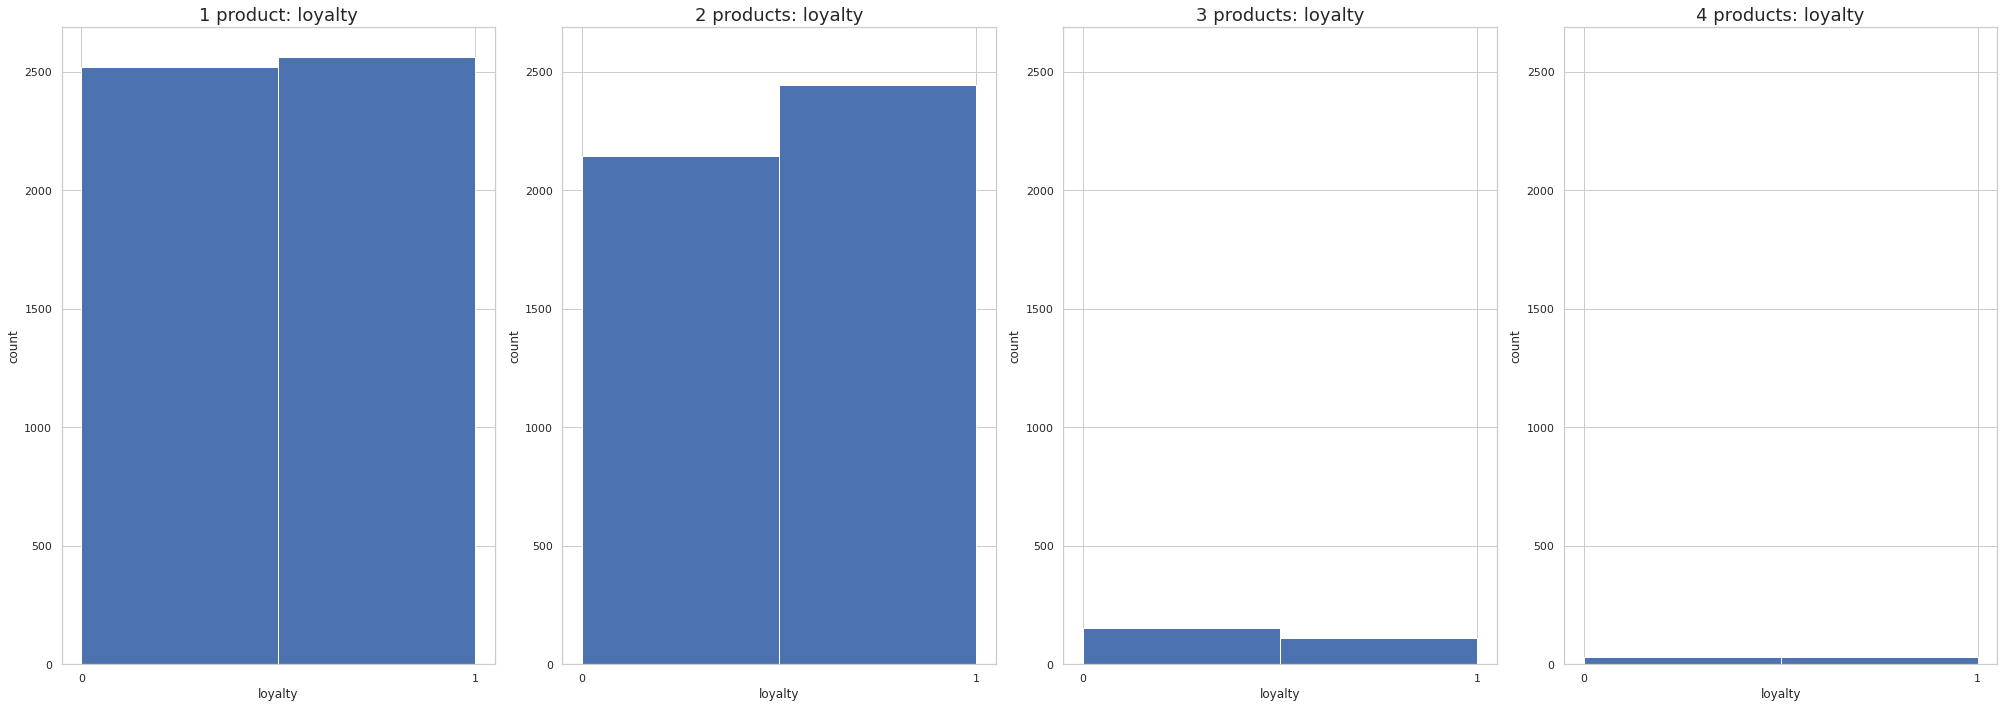

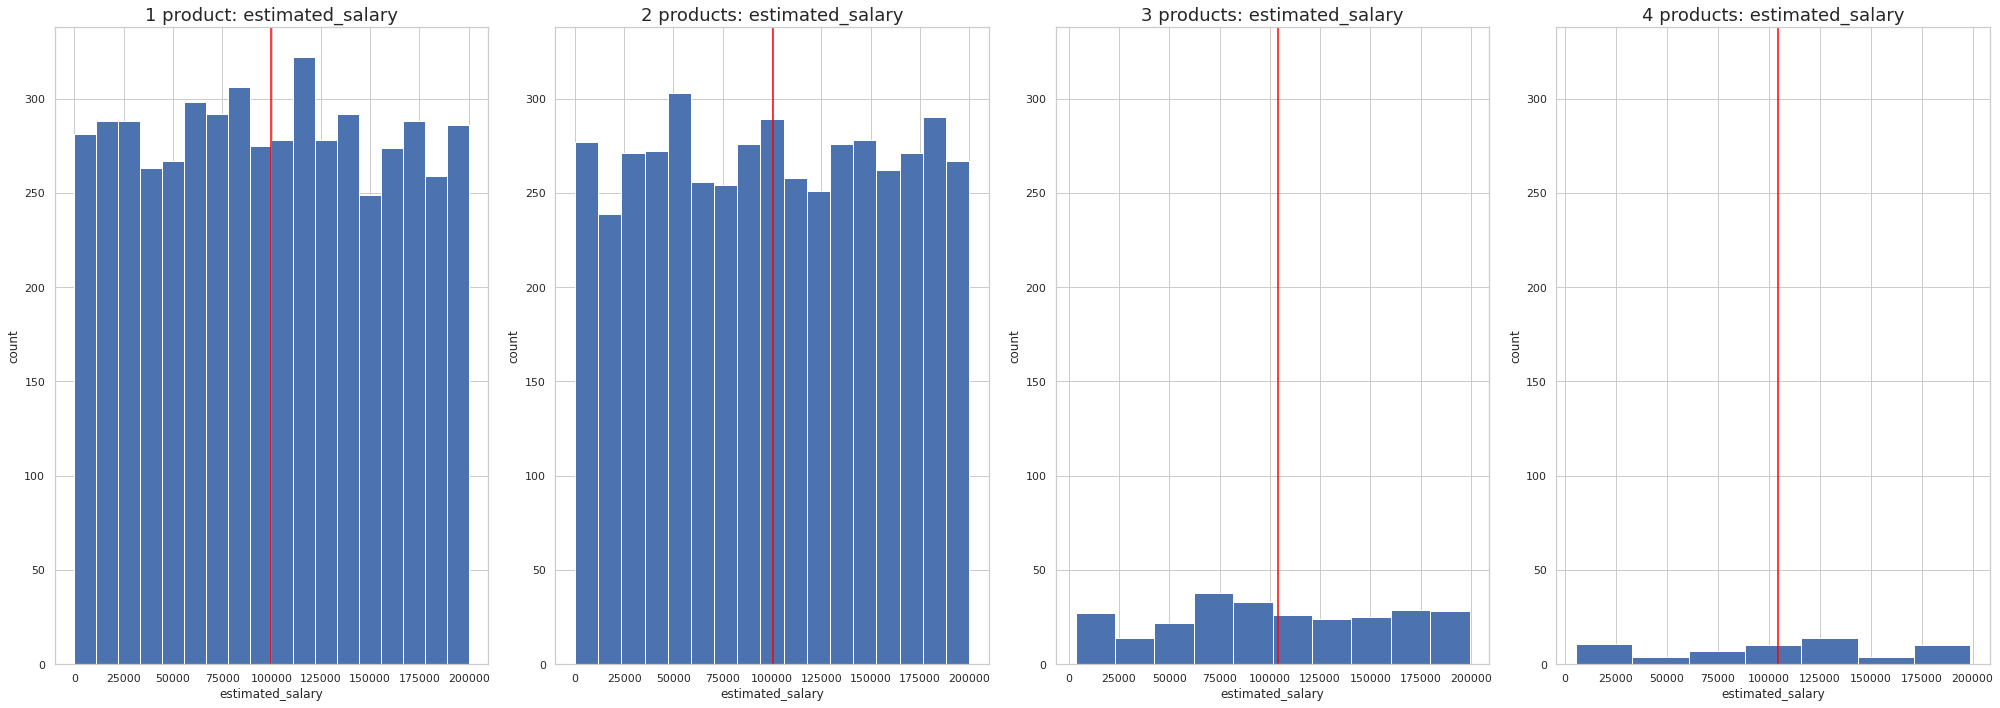

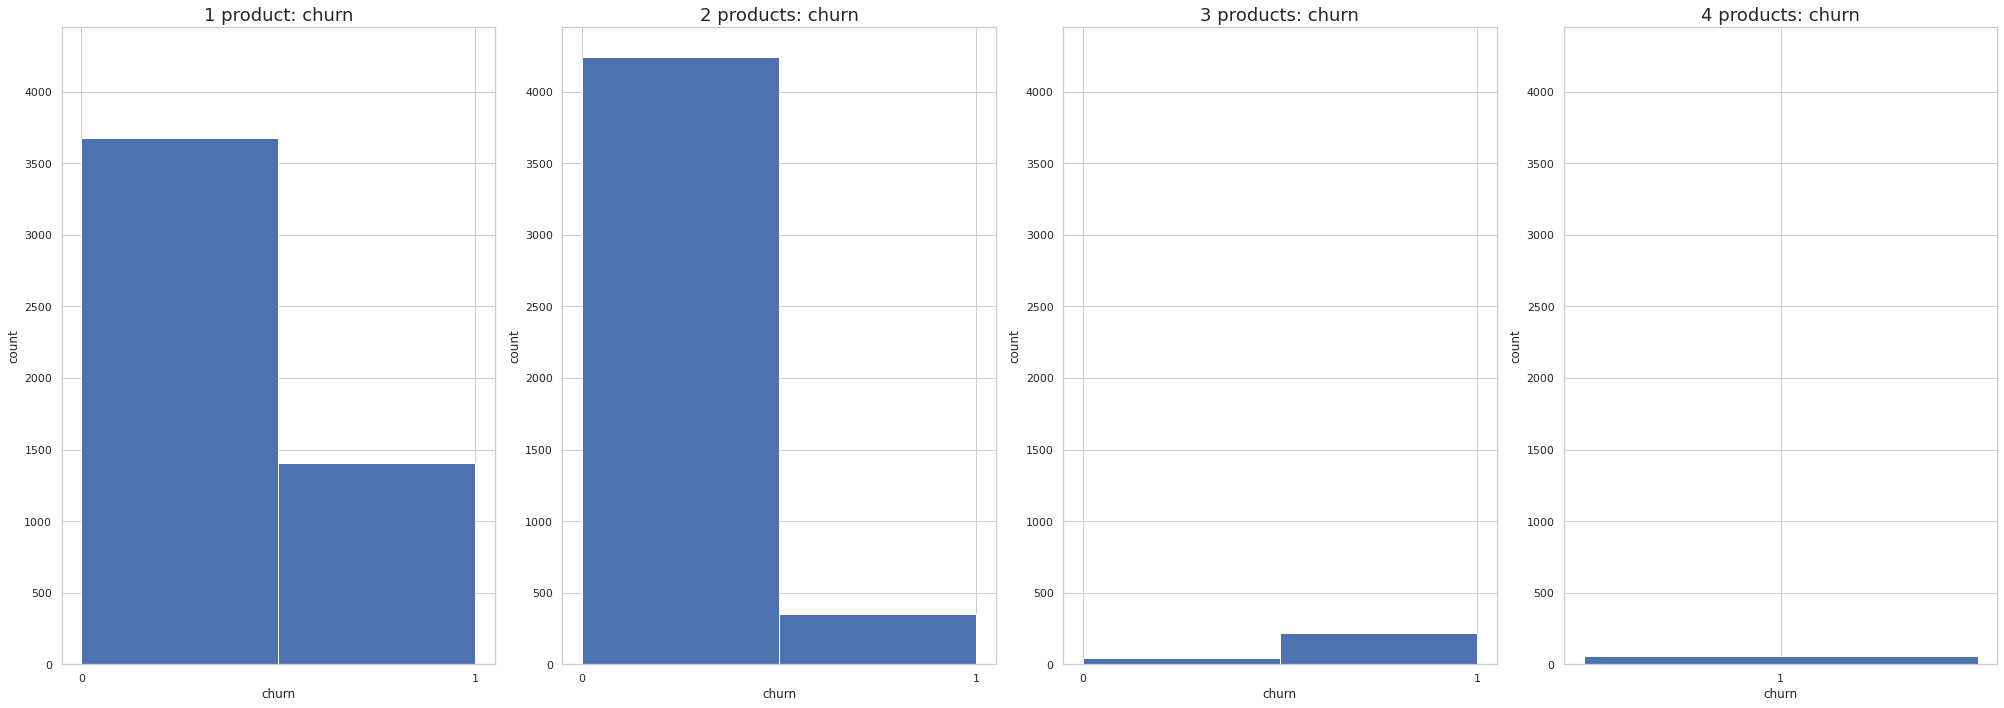

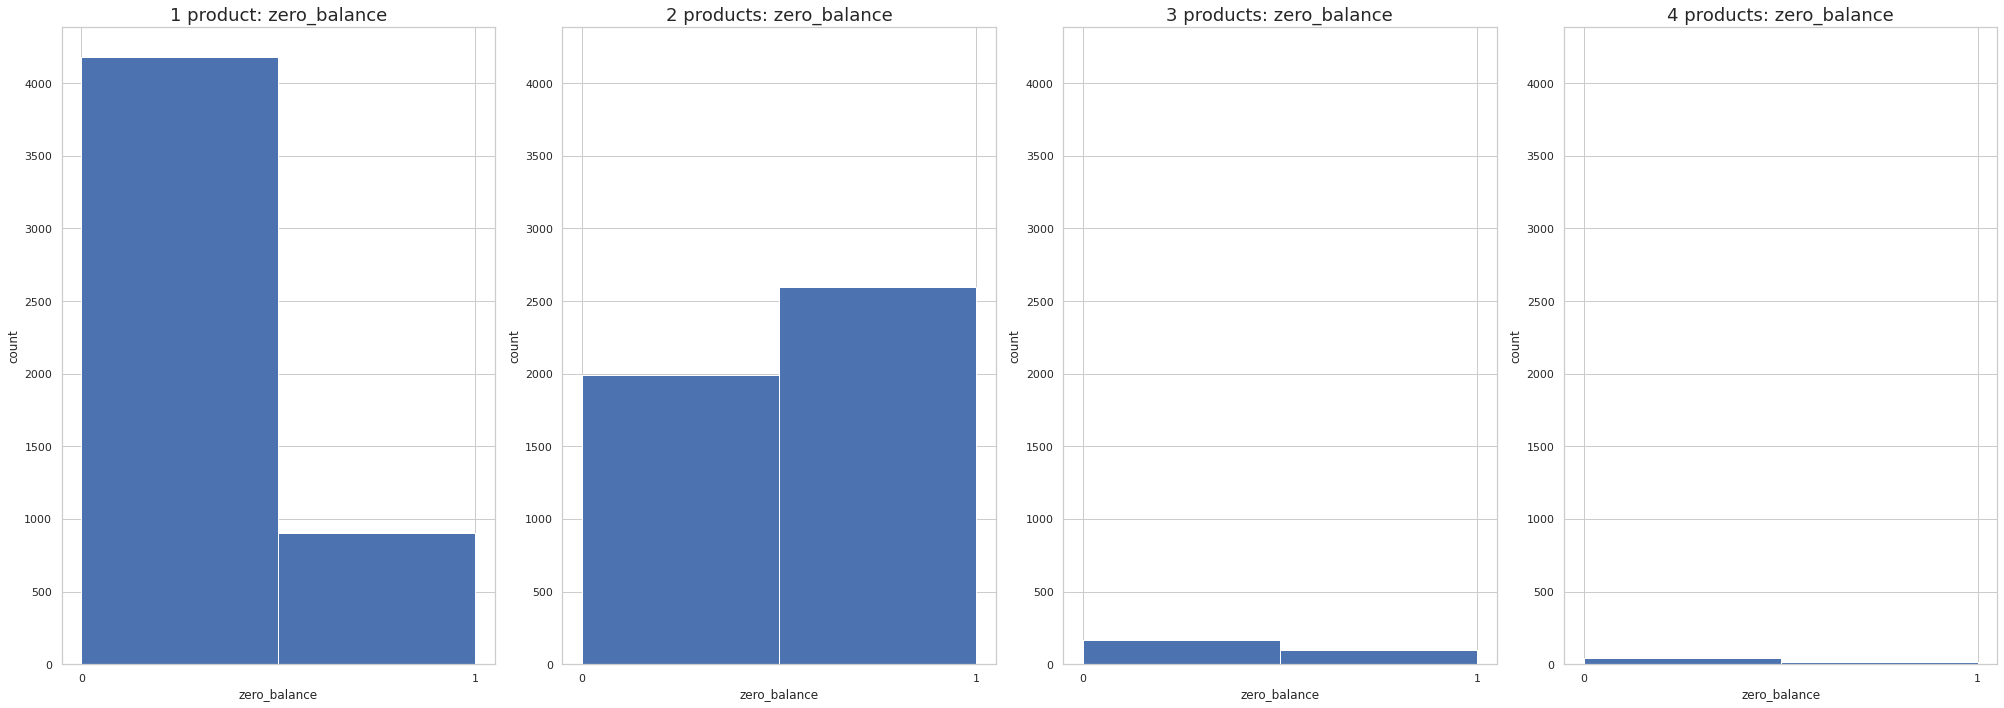

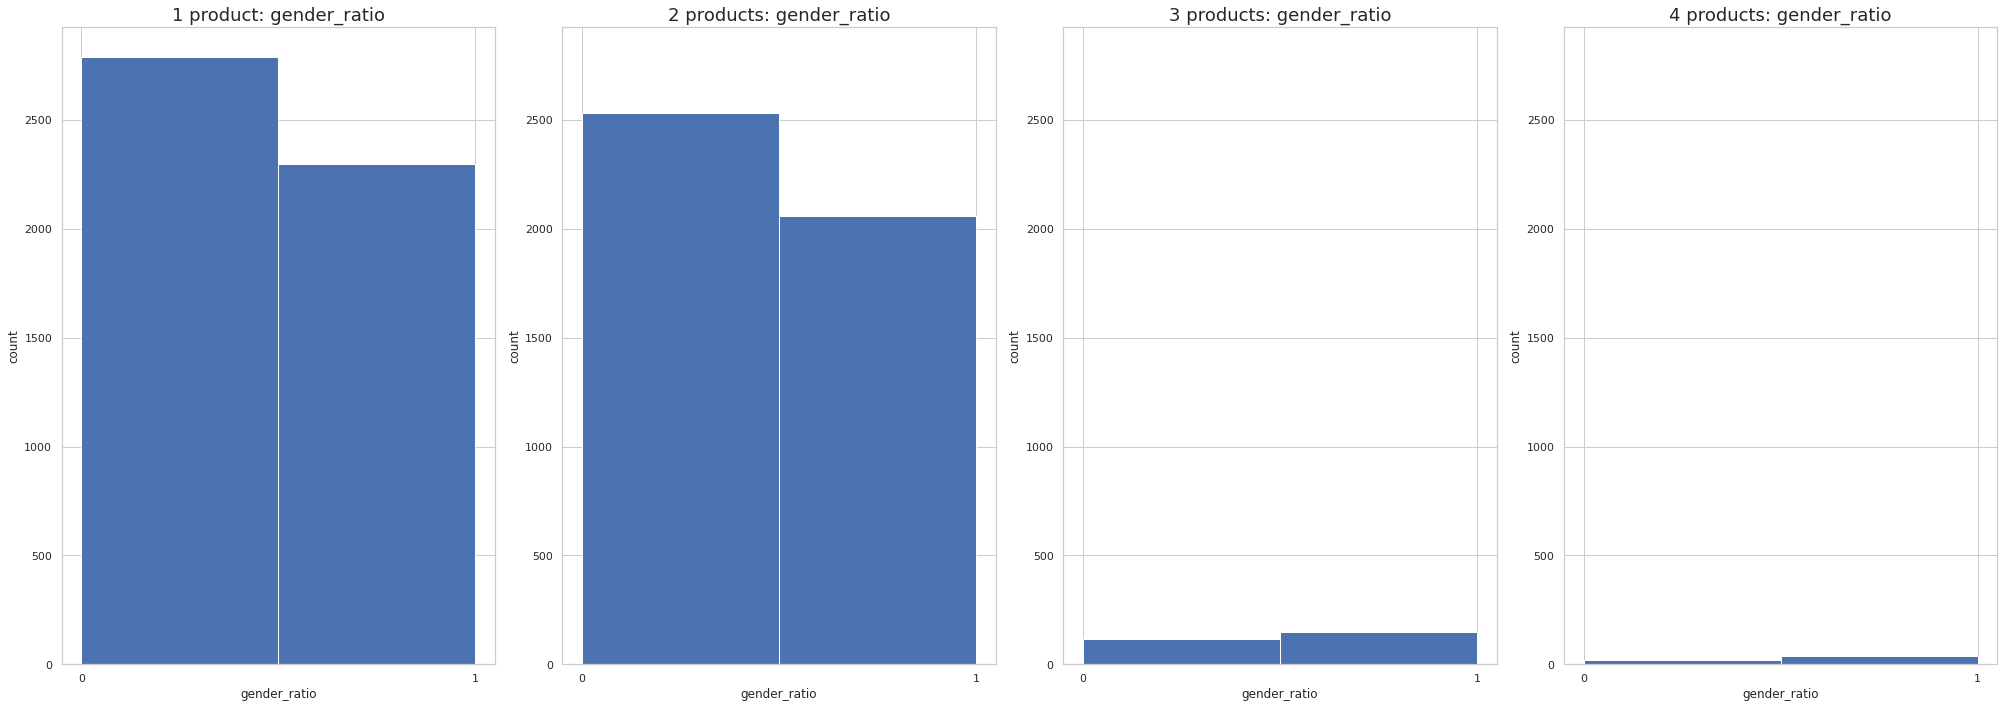

In [58]:
ncols=4
dfs=[segment_1.drop(['city','gender'],axis=1),segment_2.drop(['city','gender'],axis=1),segment_3.drop(['city','gender'],axis=1),segment_4.drop(['city','gender'],axis=1)]
for column in dfs[0].columns:
    titles=['1 product: '+column,'2 products: '+column,'3 products: '+column,'4 products: '+column]
    plot_sev_hists(ncols,column, dfs, titles, column, 'count');

Анализируя характер распределения признаков по сегментам клиентской базы сфомированным на основе количества используемых продуктов банка можно визуально отметить ряд отличительных особенностей.

*Наблюдения касаются сегментов 1 и 2 как имеющих сравнимую и и достаточную для проверки гипотез статистическими методами.*

1) Распределения по признаку "score" для сегментов 1 и 2 отличаются (для сегмента 1 большее смещение в сторону низких значений рейтинга и более высокая частота значений выше среднего) как и среднее значение признака.

2) Распределения по признаку "age" для сегментов 1 и 2 отличаются (для сегмента 1 сравнительно большая неравномерность частот значений меньших среднего возраста) как и среднее значение признака.

3) Распределения по признаку "estimated_salary"  для сегментов 1 и 2 отличаются (несовпадение распределения частот интервалов) как и среднее значение признака.

## **Формулировка и проверка статистических гипотез**<a  class="anchor" id="hypotheses"></a>

**Формирование выборок по ключевым категориям, в которых определены различия для сегментов клиентов банка**

Сформируем выборки для сегментов "1 продукт" и "2 продукта" по признаку "Кредитный рейтинг".

In [59]:
df_1_prod_score=df[df['products']==1].copy()['score']
df_2_prod_score=df[df['products']==2].copy()['score']

Сформируем выборки для сегментов "1 продукт" и "2 продукта" по признаку "Возраст".

In [60]:
df_1_prod_age=df[df['products']==1].copy()['age']
df_2_prod_age=df[df['products']==2].copy()['age']

Сформируем выборки для сегментов "1 продукт" и "2 продукта" по признаку "Ожидаемый доход".

In [61]:
df_1_prod_salary=df[df['products']==1].copy()['estimated_salary']
df_2_prod_salary=df[df['products']==2].copy()['estimated_salary']

 **Рассчет метрик, отражающих различия для сегментов клиентов банка**

In [62]:
print('Средний кредитный рейтинг клиентов: \n  пользующихся одним продуктом банка \033[32;1m{:.2f}\033[0m \n  пользующихся двумя продуктами банка \033[32;1m{:.2f}\033[0m'.format(df_1_prod_score.mean(),df_2_prod_score.mean()))

Средний кредитный рейтинг клиентов: 
  пользующихся одним продуктом банка 649.12 
  пользующихся двумя продуктами банка 652.19


In [63]:
print('Средний (медианный) возраст клиентов: \n  пользующихся одним продуктом банка \033[32;1m{:.2f}\033[0m \n  пользующихся двумя продуктами банка \033[32;1m{:.2f}\033[0m'.format(df_1_prod_age.median(),df_2_prod_age.median()))

Средний (медианный) возраст клиентов: 
  пользующихся одним продуктом банка 38.00 
  пользующихся двумя продуктами банка 36.00


In [64]:
print('Средний размер дохода клиентов: \n  пользующихся одним продуктом банка \033[32;1m{:.2f}\033[0m \n  пользующихся двумя продуктами банка \033[32;1m{:.2f}\033[0m'.format(df_1_prod_salary.mean(),df_2_prod_salary.mean()))

Средний размер дохода клиентов: 
  пользующихся одним продуктом банка 99487.26 
  пользующихся двумя продуктами банка 100452.01


**Формулировка гипотез и выбор статистических тестов для их проверки**

**Кредитный рейтинг клиентов**

1) *Нулевая гипотеза:* данные о кредитном рейтинге для сегментов "1 продукт" и "2 продукта" распределены одинаково и частоты одинаковых значений признака совпадают.

*Альтернативная гипотеза:* существуют различия в распределении данных о кредитном рейтинге для сегментов "1 продукт" и "2 продукта".

*Тест для проверки гипотезы:* ранговый U-критерий Манна — Уитни.

2) *Нулевая гипотеза:* средний кредитный рейтинг для сегментов "1 продукт" и "2 продукта" не отличается.

*Альтернативная гипотеза:* существуют различия в среднем кредитном рейтинге для сегментов "1 продукт" и "2 продукта".

*Тест для проверки гипотезы:* параметрический t-критерий Стьюдента.

**Возраст клиентов**

1) *Нулевая гипотеза:* данные о возрасте клиентов для сегментов "1 продукт" и "2 продукта" распределены одинаково и частоты одинаковых значений признака совпадают.

*Альтернативная гипотеза:* существуют различия в распределении данных о возрасте клиентов для сегментов "1 продукт" и "2 продукта".

*Тест для проверки гипотезы:* ранговый U-критерий Манна — Уитни.

2) *Нулевая гипотеза:* средний возраст клиентов для сегментов "1 продукт" и "2 продукта" не отличается.

*Альтернативная гипотеза:* существуют различия в среднем возрасте для сегментов "1 продукт" и "2 продукта".

*Тест для проверки гипотезы:* параметрический t-критерий Стьюдента.

**Ожидаемый доход клиентов**

1) *Нулевая гипотеза:* данные об ожидаемом доходе клиентов для сегментов "1 продукт" и "2 продукта" распределены одинаково и частоты одинаковых значений признака совпадают.

*Альтернативная гипотеза:* существуют различия в распределении данных об  ожидаемом доходе клиентов для сегментов "1 продукт" и "2 продукта".

*Тест для проверки гипотезы:* ранговый U-критерий Манна — Уитни.

2) *Нулевая гипотеза:* средний ожидаемый доход клиентов для сегментов "1 продукт" и "2 продукта" не отличается.

*Альтернативная гипотеза:* существуют различия в среднем ожидаемом доходе клиентовдля сегментов "1 продукт" и "2 продукта".

*Тест для проверки гипотезы:* параметрический t-критерий Стьюдента.

**Проверка выборок на соотвествие критериям применения выбранных тестов оценки статистической значимости**

In [65]:
def distribution_normality_check(data1,data2,n=5000,alpha=0.001):
    ''' 
    Функция проверяющая распределение данных в датафреймах на соотвествие нормальному
    для принятия решения о применимости теста Стьюдента для проверки статистической значимости
    Используется критерий Шапиро-Уилка и построение графика плотности вероятностей:
    - нулевая гипотеза: оцениваемый критерий в выборках распределен нормально
    - альтернативная гипотеза: выборочные средние распределены не нормально.
    Принимает на вход два датафрейма с выборками, количество подвыборок для расчета средних
    и пороговый уровень значимости альфа 
    Возвращает и отрисовывает объект matplotlib.axes.Axes
    '''
    # проверка и загрузка необходимых модулей
    try:
        if ('numpy' not in sys.modules or 'np' not in dir()):
            import numpy as np 
        if ('seaborn' not in sys.modules or 'sns' not in dir()):
            import seaborn as sns
        if ('scipy.stats' not in sys.modules or 'st' not in dir()):
            import scipy.stats as st
        if ('tqdm' not in sys.modules or 'tqdm' not in dir()):
            from tqdm import tqdm
    except:
        import sys
        if ('numpy' not in sys.modules or 'np' not in dir()):
            import numpy as np 
        if ('seaborn' not in sys.modules or 'sns' not in dir()):
            import seaborn as sns
        if ('scipy.stats' not in sys.modules or 'st' not in dir()):
            import scipy.stats as st
        if ('tqdm' not in sys.modules or 'tqdm' not in dir()):
            from tqdm import tqdm

    # определение функций, задающих параметры графиков
    def set_titles(ax,title,ylabel='',xlabel=''):
        ax.ticklabel_format(style='plain')
        if ylabel != '':
            ax.set_ylabel(ylabel)
        if xlabel != '':
            ax.set_xlabel(xlabel)
        ax.set_title(title)
        ax.title.set_color('black')
        ax.title.set_size(14)

    def plt_text(ax,text,passed):
        if passed=='yes':
            color='green'
        else:
            color='tab:red'
        ax.text(0.5,0.5,text,fontsize='x-large',horizontalalignment='center',verticalalignment='center',linespacing=2,c=color) 
        ax.set_xticks([])
        ax.set_yticks([])
        ax.axis('off')

    # определение функции, проверяющей датафреймы на соотвествие распределений данных нормальному
    def shapiro_test(data):
        x,y = st.shapiro(data)
        p_value=format(y,'.8f')
        if (y < alpha):
            verdict='Normal distribution of data: rejected'
            passed='no'
        else:
            verdict='Normal distribution of data: not rejected'
            passed='yes'
        return ['p-value = '+p_value+'\n'+verdict,passed]

    # генерация выборок из датафреймов и рассчет средних по выборкам
    means_1 = []
    means_2 = []

    len_1 = len(data1)
    len_2 = len(data2)

    for _ in tqdm(range(n)):
        sample_1 = np.random.choice(data1, size=len_1, replace=True)
        sample_2 = np.random.choice(data2, size=len_2, replace=True)
        means_1.append(sample_1.mean())
        means_2.append(sample_2.mean()) 
     
    print('\n')    

    # построение графиков

    plt.figure(figsize=(21,15))  

    ax1 = plt.subplot2grid((5, 2), (0, 0),rowspan=2)
    sns.histplot(means_1, ax=ax1, bins=50, kde=True)
    ax1.axvline(data1.mean(), color='red')
    title='Distribution of first data sample means'
    ylabel='counts'
    xlabel='means values'
    set_titles(ax1,title,ylabel,xlabel)
    
    ax2 = plt.subplot2grid((5, 2), (0, 1),rowspan=2)
    sns.histplot(means_2, ax=ax2, bins=50, kde=True)
    ax2.axvline(data2.mean(), color='red')
    title='Distribution of second data sample means'
    ylabel='counts'
    xlabel='means values'
    set_titles(ax2,title,ylabel,xlabel)

    ax3 = plt.subplot2grid((5, 2), (2, 0),rowspan=2)
    st.probplot(means_1, dist="norm", plot=plt, rvalue=True)
    set_titles(ax3,'Proximity to the normal distribution (red line) of first data sample means')

    ax4 = plt.subplot2grid((5, 2), (2, 1),rowspan=2)
    st.probplot(means_2, dist="norm", plot=plt,rvalue=True)
    set_titles(ax4,'Proximity to the normal distribution (red line) of second data sample means')

    ax5 = plt.subplot2grid((5, 2), (4, 0))
    test_res=shapiro_test(means_1)
    text='Shapiro–Wilk test for first data sample means:\n'+test_res[0]
    plt_text(ax5,text,test_res[1])
    
    ax6 = plt.subplot2grid((5, 2), (4, 1))
    test_res=shapiro_test(means_2)
    text='Shapiro–Wilk test for second data sample means:\n'+test_res[0]
    plt_text(ax6,text,test_res[1])

    plt.tight_layout()
    plt.show() 



---

Проверим выборки по кредитному рейтингу для сегментов 1 и 2 на соотвествие условиям применения t-теста для оценки статистической значимости различий в средних значениях.

100%|██████████| 5000/5000 [00:01<00:00, 3092.58it/s]


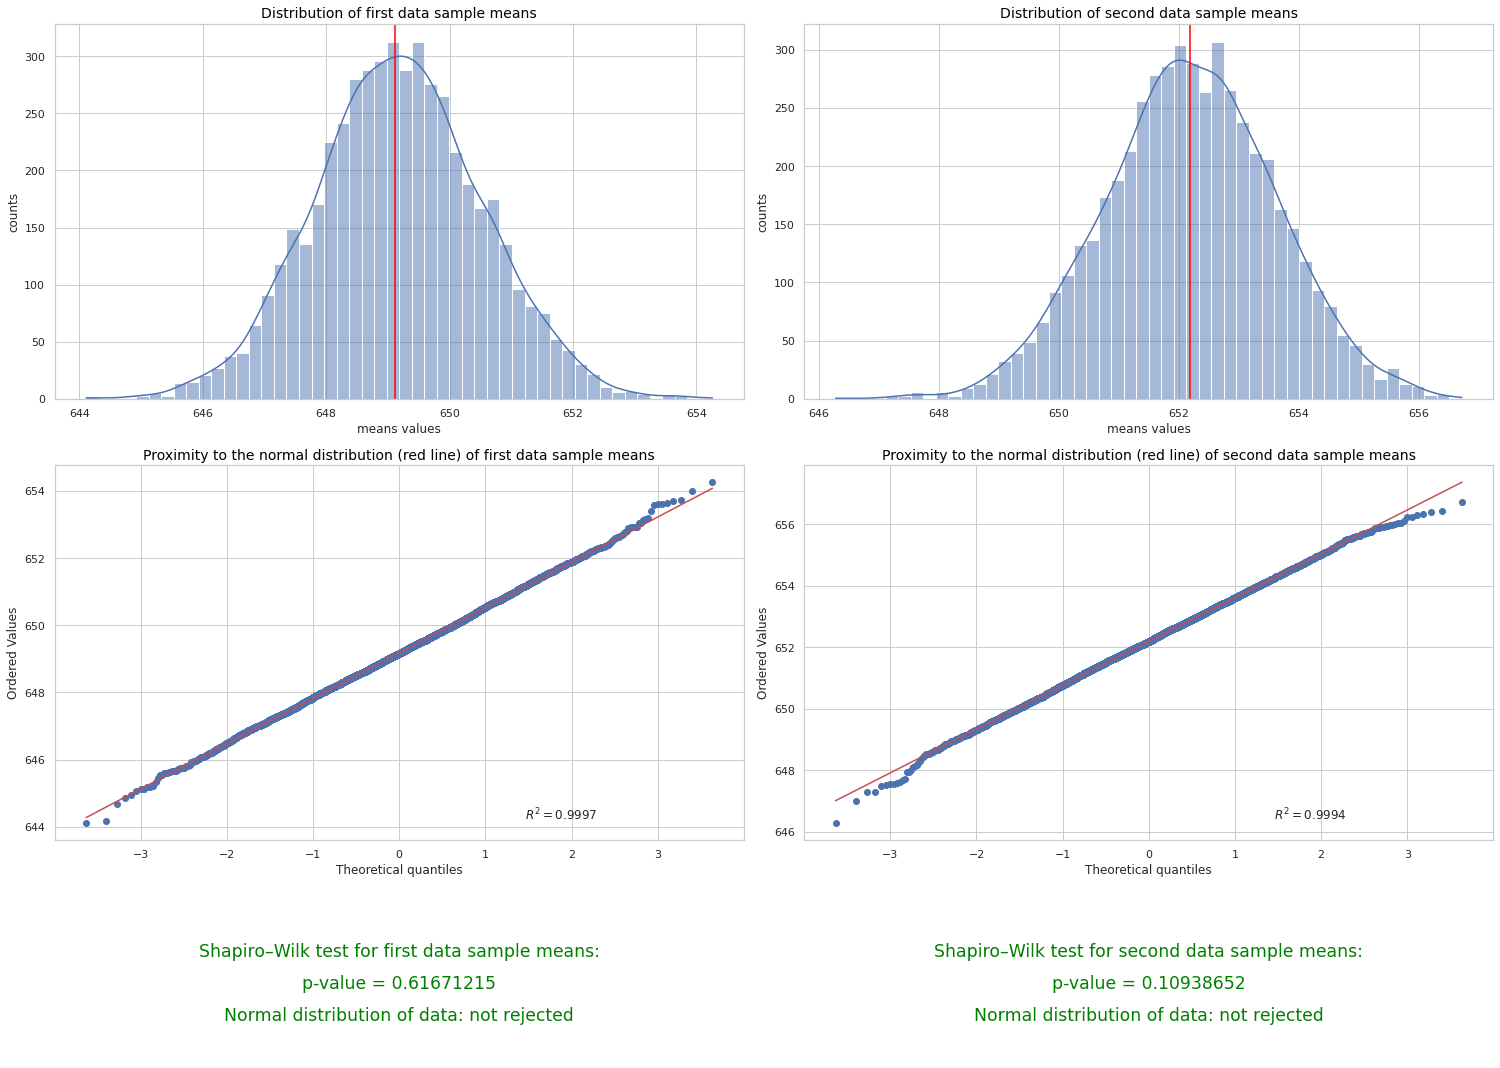

In [66]:
distribution_normality_check(df_1_prod_score,df_2_prod_score)

**Вывод:** t-тест может быть применен для оценки статистической значимости различий в среднем кредитном рейтинге по сегментам 1 и 2.



---

Проверим выборки по возрасту клиентов для сегментов 1 и 2 на соотвествие условиям применения t-теста для оценки статистической значимости различий в средних значениях.

100%|██████████| 5000/5000 [00:01<00:00, 3165.79it/s]


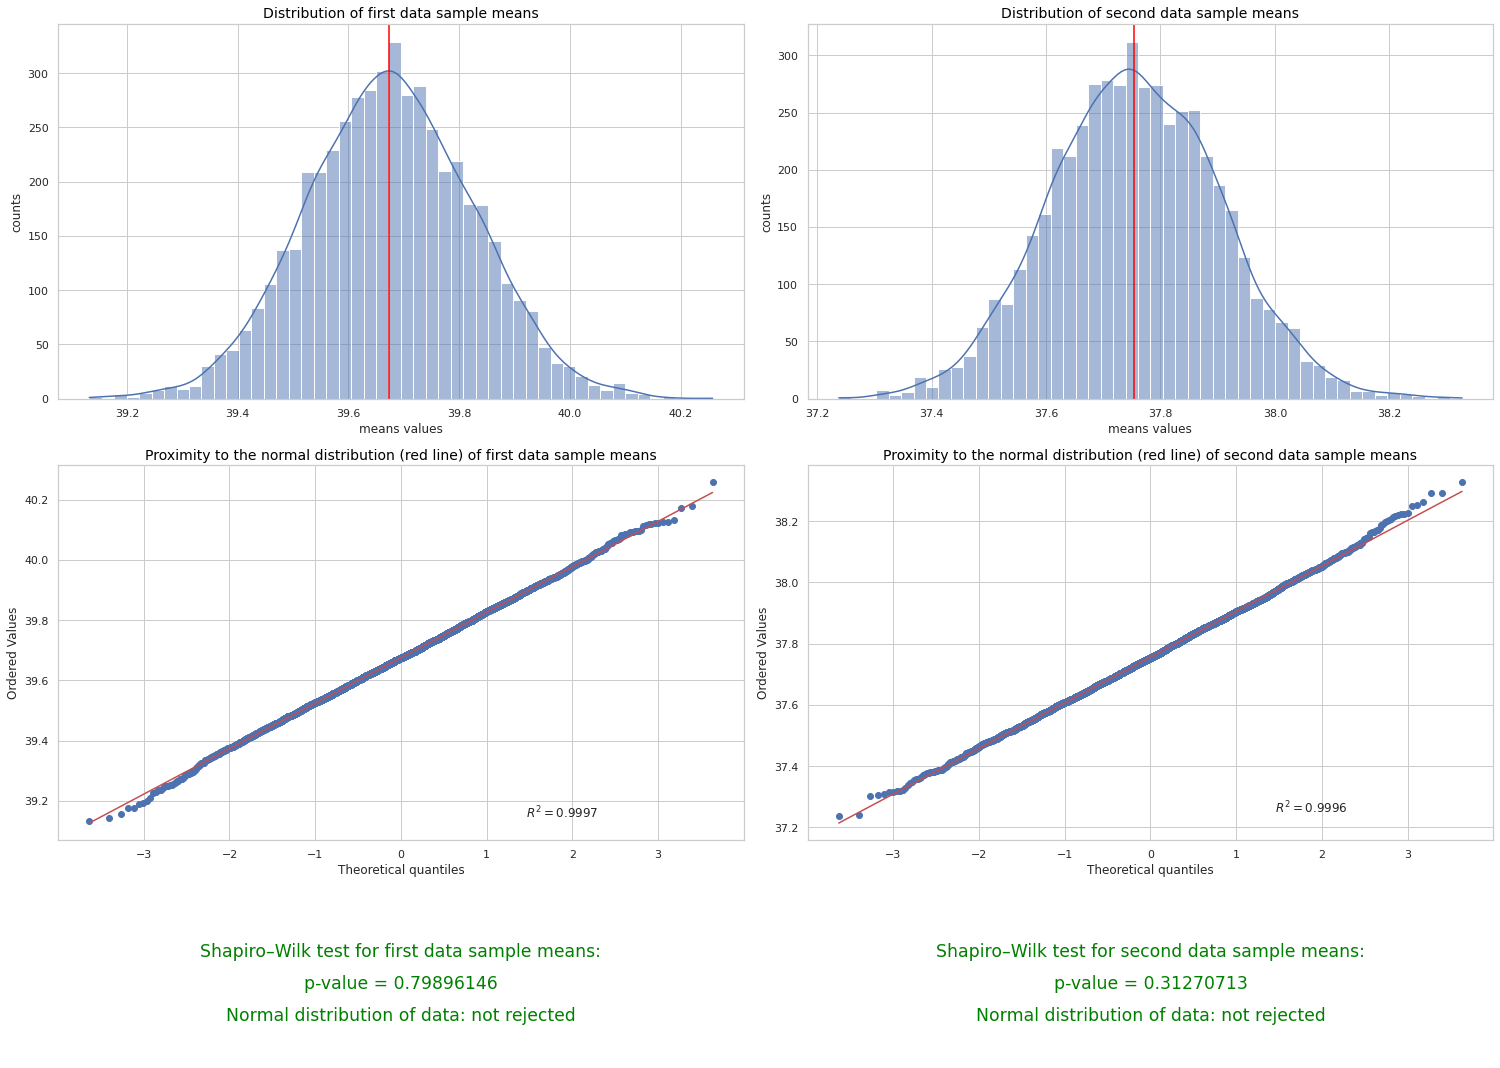

In [67]:
distribution_normality_check(df_1_prod_age,df_2_prod_age)

**Вывод:** t-тест может быть применен для оценки статистической значимости различий в среднем возрасте клиентов по сегментам 1 и 2.



---

Проверим выборки по ожидаемому доходу для сегментов 1 и 2 на соотвествие условиям применения t-теста для оценки статистической значимости различий в средних значениях.

100%|██████████| 5000/5000 [00:01<00:00, 3020.76it/s]


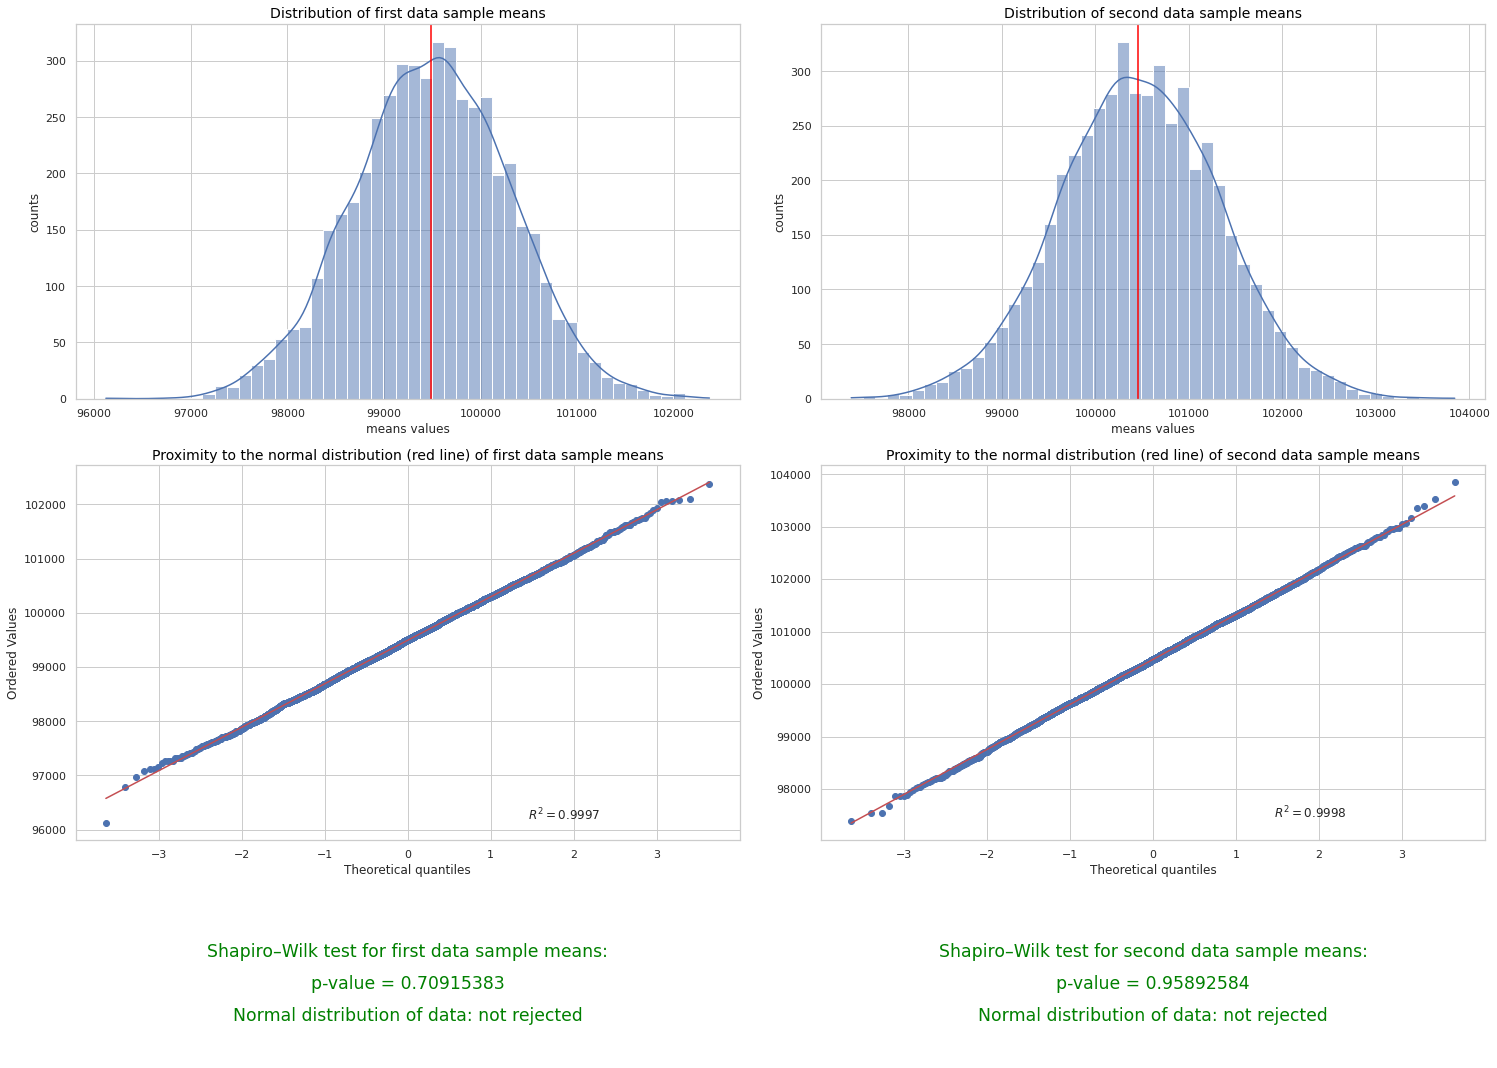

In [68]:
distribution_normality_check(df_1_prod_salary,df_2_prod_salary)

**Вывод:** t-тест может быть применен для оценки статистической значимости различий в среднем ожидаемом доходе клиентов по сегментам 1 и 2.



---


**Проверка гипотез  и выводы о наличии статистической значимости результатов**

In [69]:
def result_checking(test,alpha=0.05):
    if test.pvalue>alpha:
        print('Значение p-value: \033[1m{}\033[0m\n\033[31;1mНулевая гипотеза не отклонена\033[0m'.format(test.pvalue))
    else:
        print('Значение p-value: \033[1m{}\033[0m\n\033[32;1mОтклоняем нулевую гипотезу\033[0m'.format(test.pvalue))

Проверим гипотезу об отличии в распределении данных о кредитном рейтинге клиентов для сегментов "1 продукт" и "2 продукта". Пороговое значение alpha примем равным 0,05.

In [70]:
result_checking(st.mannwhitneyu(df_1_prod_score,df_2_prod_score))

Значение p-value: 0.15729739033138807
Нулевая гипотеза не отклонена


Проверим гипотезу об отличии в средних значениях кредитного рейтинга клиентов для сегментов "1 продукт" и "2 продукта". Пороговое значение alpha примем равным 0,05.

In [71]:
result_checking(st.ttest_ind(df_1_prod_score,df_2_prod_score,equal_var=False))

Значение p-value: 0.11889293846062188
Нулевая гипотеза не отклонена


**Вывод:** на основании представленных данных нельзя утверждать, что существуют различия в частотах распределения признака или средних значениях кредитного рейтинга сегментов "1 продукт" и "2 продукта" 

---



Проверим гипотезу об отличии в распределении данных о возрасте клиентов для сегментов "1 продукт" и "2 продукта". Пороговое значение alpha примем равным 0,05.

In [72]:
result_checking(st.mannwhitneyu(df_1_prod_age,df_2_prod_age))

Значение p-value: 1.248185983698308e-22
Отклоняем нулевую гипотезу


Проверим гипотезу об отличии в средних значениях возраста клиентов для сегментов "1 продукт" и "2 продукта". Пороговое значение alpha примем равным 0,05.

In [73]:
result_checking(st.ttest_ind(df_1_prod_age,df_2_prod_age,equal_var=False))

Значение p-value: 1.4069637543991388e-19
Отклоняем нулевую гипотезу


**Вывод:** на основании представленных данных можно утверждать, что существуют различия в частотах распределения признака (возрастной состав отличается) и средних значениях возраста клиентов сегментов "1 продукт" и "2 продукта" (средний возраст клиентов сегмента "2 продукта" меньше среднего возраста клиентов сегмена "1 продукт"). 

---



Проверим гипотезу об отличии в распределении данных об ожидаемом доходе клиентов для сегментов "1 продукт" и "2 продукта". Пороговое значение alpha примем равным 0,05.

In [74]:
result_checking(st.mannwhitneyu(df_1_prod_salary,df_2_prod_salary))

Значение p-value: 0.4079566651927651
Нулевая гипотеза не отклонена


Проверим гипотезу об отличии в средних значениях ожидаемого дохода клиентов для сегментов "1 продукт" и "2 продукта". Пороговое значение alpha примем равным 0,05.

In [75]:
result_checking(st.ttest_ind(df_1_prod_salary,df_2_prod_salary,equal_var=False))

Значение p-value: 0.4106493940071987
Нулевая гипотеза не отклонена


**Вывод:** на основании представленных данных нельзя утверждать, что существуют различия в частотах распределения признака или средних значениях ожидаемого дохода клиентов сегментов "1 продукт" и "2 продукта" 

---



**Дополнительные вычисления**

Для формирования рекомендаций дополнительно проанализируем как имеющаяся информация об использующихся продуктах в сегменте 2 соотностится с показателями активности клиентов и их оттока. Можно дополнительно выделить из второго сегмента группы:

- клиенты с двумя продуктами, один из которых счет, и кредитной картой;
- клиенты с двумя продуктами, один из которых счет, без кредитной карты;
- клиенты с  кредитной картой и двумя продуктами, не включающими дебетовый счет;
- клиенты с двумя продуктами, у которых нет ни счета и ни кредитной карты.

In [76]:
print('Клиенты сегмента "2 продукта" имеющие счет и кредитную карту: \n  доля активных \033[32;1m{:.2f}\033[0m \n  коэффициент оттока \033[32;1m{:.2f}\033[0m'.format(segment_2[(segment_2['zero_balance']==0)&(segment_2['credit_card']==1)]['loyalty'].mean(),segment_2[(segment_2['zero_balance']==0)&(segment_2['credit_card']==1)]['churn'].mean()))

Клиенты сегмента "2 продукта" имеющие счет и кредитную карту: 
  доля активных 0.53 
  коэффициент оттока 0.13


In [77]:
print('Клиенты сегмента "1 продукт" имеющие счет: \n  доля активных \033[32;1m{:.2f}\033[0m \n  коэффициент оттока \033[32;1m{:.2f}\033[0m'.format(segment_1[(segment_1['zero_balance']==0)]['loyalty'].mean(),segment_1[(segment_1['zero_balance']==0)]['churn'].mean()))

Клиенты сегмента "1 продукт" имеющие счет: 
  доля активных 0.51 
  коэффициент оттока 0.26


In [78]:
print('Клиенты сегмента "2 продукта" имеющие счет и не имеющие кредитную карту: \n  доля активных \033[32;1m{:.2f}\033[0m \n  коэффициент оттока \033[32;1m{:.2f}\033[0m'.format(segment_2[(segment_2['zero_balance']==0)&(segment_2['credit_card']==0)]['loyalty'].mean(),segment_2[(segment_2['zero_balance']==0)&(segment_2['credit_card']==0)]['churn'].mean()))

Клиенты сегмента "2 продукта" имеющие счет и не имеющие кредитную карту: 
  доля активных 0.54 
  коэффициент оттока 0.14


In [79]:
print('Клиенты сегмента "2 продукта" не имеющие счета и имеющие кредитную карту: \n  доля активных \033[32;1m{:.2f}\033[0m \n  коэффициент оттока \033[32;1m{:.2f}\033[0m'.format(segment_2[(segment_2['zero_balance']==1)&(segment_2['credit_card']==1)]['loyalty'].mean(),segment_2[(segment_2['zero_balance']==1)&(segment_2['credit_card']==1)]['churn'].mean()))

Клиенты сегмента "2 продукта" не имеющие счета и имеющие кредитную карту: 
  доля активных 0.54 
  коэффициент оттока 0.03


In [80]:
print('Клиенты сегмента "2 продукта" не имеющие счета и кредитной карты: \n  доля активных \033[32;1m{:.2f}\033[0m \n  коэффициент оттока \033[32;1m{:.2f}\033[0m'.format(segment_2[(segment_2['zero_balance']==1)&(segment_2['credit_card']==0)]['loyalty'].mean(),segment_2[(segment_2['zero_balance']==1)&(segment_2['credit_card']==0)]['churn'].mean()))

Клиенты сегмента "2 продукта" не имеющие счета и кредитной карты: 
  доля активных 0.52 
  коэффициент оттока 0.04


## **Выводы и рекомендации**<a  class="anchor" id="summary"></a>

Наиболее активно расширяют портфель продуктов (с одного до двух) клиенты в возрасте до 40 лет. Для этой целевой группы можно рекомендовать проведение маркетинговых мероприятий для расширения пакета предоставляемых услуг. Также следует рассмотреть возможность внедрения или популяризации продукта, направленного на женскую аудиторию, с целью исправления гендерного дисбаланса в размере портфеля услуг, активности и оттоке клиентов.

Можно рекомендовать стимулирование клиентов, имеющих только действующий дебетовый счет в банке, к открытию кредитной карты или иного дополнительного продукта (перечень опредляется после продуктового анализа сегмента клиентов "2 продукта"). Это может существенно снизить риск оттока клиентов и повысить их активность.

Анализ показывает, что при увеличении количества используемых продуктов банка, повышается риск оттока клиентов и снижается их активность. Требуются дополнительные исследования состава продуктовых портфелей клиентов на предмет наличия пакетных услуг, от которых отказываются по истечении льготного периода, изменения тарифов или группового перевода на обслуживание в другой банк.

Рекомендуется обратить внимание на условия привлечения депозитов клиентов, тарифы на ведение текущих счетов и дебетовых карт, так как группы клиентов, по которым не имеется информации о наличии и балансе дебетовых счетов, показывают в среднем значительно меньший отток по сравнению с остальными клиентами.